In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [13]:
from config import config
import pandas
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import papermill as pm
import scrapbook as sb
from stacked_data import stacked_data
from tqdm import tqdm
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics

from evaluate import calculate_confusion_matrix_stats, plot_roc_curve, plot_precision_recall, plot_confusion_matrix_ensemble

# Ensemble models

In [2]:
MODELS = [
    "2718a5c3-50cf-4b0c-aa44-8cbf5cd26136", # features
    "6baad1dd-8b7c-42ae-8ba0-417b5f967852" # t2 
]

In [3]:
models = MODELS
print("models: {}".format(models))

models: ['2718a5c3-50cf-4b0c-aa44-8cbf5cd26136', '6baad1dd-8b7c-42ae-8ba0-417b5f967852']


In [4]:
sd = stacked_data(uuids=models)

 15%|█▍        | 87/597 [00:00<00:00, 868.59it/s]

Training points = 597
Benign: 347, Intermediate: 250, Malignant: 0

Validation points = 163
Benign: 98, Intermediate: 65, Malignant: 0

Testing points = 92
Benign: 53, Intermediate: 39, Malignant: 0
bone-china-002
bone-china-004
bone-china-005
bone-china-006
bone-china-008
bone-china-009
bone-china-010
bone-china-014
bone-china-015
bone-china-019
bone-china-020
bone-china-021
bone-china-022
bone-china-023
bone-china-027
bone-china-028
bone-china-029
bone-china-031
bone-china-032
bone-china-033
bone-china-035
bone-china-037
bone-china-038
bone-china-039
bone-china-041
bone-china-042
bone-china-044
bone-china-045
bone-china-046
bone-china-047
bone-china-050
bone-china-051
bone-china-052
bone-china-053
bone-china-055
bone-china-056
bone-china-058
bone-china-059
bone-china-060
bone-china-061
bone-china-062
bone-china-065
bone-china-066
bone-china-068
bone-china-069
bone-china-070
bone-china-071
bone-china-072
bone-china-074
bone-china-075
bone-china-076
bone-china-079
bone-china-080
bone-c

 47%|████▋     | 278/597 [00:00<00:00, 908.61it/s]


bone-china-192
bone-china-193
bone-china-194
bone-china-196
bone-china-198
bone-china-199
bone-china-203
bone-china-209
bone-china-212
bone-china-213
bone-china-215
bone-china-216
bone-china-217
bone-china-221
bone-china-222
bone-china-223
bone-china-225
bone-china-228
bone-china-231
bone-china-234
bone-china-242
bone-china-243
bone-penn-081
bone-penn-082
bone-penn-083
bone-penn-084
bone-penn-085
bone-penn-086
bone-penn-090
bone-penn-091
bone-penn-092
bone-penn-093
bone-penn-094
bone-penn-095
bone-penn-097
bone-penn-099
bone-penn-105
bone-penn-106
bone-penn-107
bone-penn-109
bone-penn-110
bone-penn-111
bone-penn-112
bone-penn-113
bone-penn-116
bone-penn-118
bone-penn-119
bone-penn-120
bone-penn-122
bone-penn-126
bone-penn-130
bone-penn-131
bone-penn-134
bone-penn-137
bone-penn-139
bone-penn-140
bone-penn-141
bone-penn-142
bone-penn-147
bone-penn-148
bone-penn-149
bone-penn-150
bone-penn-152
bone-penn-154
bone-penn-155
bone-penn-156
bone-penn-157
bone-penn-160
bone-penn-161
bone-penn-1

 76%|███████▌  | 454/597 [00:00<00:00, 872.52it/s]


bone-penn-446
bone-penn-453
bone-penn-454
bone-penn-457
bone-penn-458
bone-penn-459
bone-penn-460
bone-penn-461
bone-penn-463
bone-penn-465
bone-penn-467
bone-penn-471
bone-penn-473
bone-penn-476
bone-penn-478
bone-penn-480
bone-penn-482
bone-penn-484
bone-penn-487
bone-penn-489
bone-penn-490
bone-penn-494
bone-penn-495
bone-penn-496
bone-penn-497
bone-penn-501
bone-penn-503
bone-penn-506
bone-penn-509
bone-penn-512
bone-penn-514
bone-penn-515
bone-penn-516
bone-penn-517
bone-penn-518
bone-penn-520
bone-penn-521
bone-penn-522
bone-penn-527
bone-penn-528
bone-penn-529
bone-penn-530
bone-penn-535
bone-penn-536
bone-penn-538
bone-penn-541
bone-penn-546
bone-penn-548
bone-penn-549
bone-penn-551
bone-penn-555
bone-penn-556
bone-penn-561
bone-penn-565
bone-penn-568
bone-penn-571
bone-penn-572
bone-penn-575
bone-penn-577
bone-penn-578
bone-penn-579
bone-penn-585
bone-penn-586
bone-penn-587
bone-penn-588
bone-penn-589
bone-penn-591
bone-penn-592
bone-penn-593
bone-penn-596
bone-penn-597
bone-

  0%|          | 0/163 [00:00<?, ?it/s]


bone-hup-23
bone-hup-231
bone-hup-232
bone-hup-234
bone-hup-237
bone-hup-244
bone-hup-248
bone-hup-257
bone-hup-261
bone-hup-262
bone-hup-263
bone-hup-265
bone-hup-266
bone-hup-271
bone-hup-272
bone-hup-275
bone-hup-276
bone-hup-277
bone-hup-279
bone-hup-281
bone-hup-287
bone-hup-290
bone-hup-291
bone-hup-293
bone-hup-296
bone-hup-297
bone-hup-298
bone-hup-299
bone-hup-3
bone-hup-302
bone-hup-305
bone-hup-306
bone-hup-308
bone-hup-310
bone-hup-312
bone-hup-314
bone-hup-316
bone-hup-317
bone-hup-321
bone-hup-325
bone-hup-326
bone-hup-328
bone-hup-330
bone-hup-51
bone-hup-52
bone-hup-53
bone-hup-55
bone-hup-56
bone-hup-59
bone-hup-60
bone-hup-61
bone-hup-62
bone-hup-65
bone-hup-67
bone-hup-69
bone-hup-70
bone-hup-76
bone-hup-78
bone-hup-79
bone-hup-80
bone-hup-81
bone-hup-85
bone-hup-93
bone-hup-94
bone-hup-95
bone-penn-001
bone-penn-005
bone-penn-007
bone-penn-011
bone-penn-014
bone-penn-015
bone-penn-018
bone-penn-019
bone-penn-020
bone-penn-021
bone-penn-022
bone-penn-024
bone-penn-0

100%|██████████| 163/163 [00:00<00:00, 625.40it/s]


bone-penn-108
bone-penn-115
bone-penn-124
bone-penn-132
bone-penn-143
bone-penn-151
bone-penn-159
bone-penn-165
bone-penn-166
bone-penn-169
bone-penn-176
bone-penn-182
bone-penn-186
bone-penn-203
bone-penn-211
bone-penn-226
bone-penn-234
bone-penn-259
bone-penn-263
bone-penn-265
bone-penn-270
bone-penn-273
bone-penn-274
bone-penn-275
bone-penn-281
bone-penn-309
bone-penn-329
bone-penn-334
bone-penn-378
bone-penn-381
bone-penn-390
bone-penn-401
bone-penn-403
bone-penn-439
bone-penn-456
bone-penn-462
bone-penn-464
bone-penn-466
bone-penn-468
bone-penn-479
bone-penn-481
bone-penn-485
bone-penn-488
bone-penn-491
bone-penn-492
bone-penn-498
bone-penn-500
bone-penn-502
bone-penn-504
bone-penn-508
bone-penn-511
bone-penn-526
bone-penn-532
bone-penn-537
bone-penn-553
bone-penn-564
bone-penn-576
bone-penn-583
bone-penn-584
bone-penn-590
bone-penn-595
bone-penn-607
bone-penn-608
bone-penn-618
bone-penn-628
bone-penn-645
bone-penn-646
bone-penn-647
bone-hup-129
bone-hup-144
bone-hup-145
bone-hup


100%|██████████| 92/92 [00:00<00:00, 749.68it/s]


bone-china-007
bone-china-012
bone-china-013
bone-china-018
bone-china-063
bone-china-064
bone-china-067
bone-china-082
bone-china-090
bone-china-094
bone-china-130
bone-china-137
bone-china-141
bone-china-142
bone-china-150
bone-china-156
bone-china-157
bone-china-181
bone-china-182
bone-china-202
bone-china-206
bone-china-208
bone-china-229
bone-china-232
bone-china-233
bone-china-235
bone-china-241
bone-penn-080
bone-penn-102
bone-penn-103
bone-penn-117
bone-penn-135
bone-penn-145
bone-penn-175
bone-penn-184
bone-penn-185
bone-penn-202
bone-penn-229
bone-penn-233
bone-penn-271
bone-penn-290
bone-penn-295
bone-penn-326
bone-penn-366
bone-penn-383
bone-penn-387
bone-penn-389
bone-penn-393
bone-penn-407
bone-penn-432
bone-penn-469
bone-penn-470
bone-penn-475
bone-penn-486
bone-penn-493
bone-penn-499
bone-penn-505
bone-penn-510
bone-penn-513
bone-penn-519
bone-penn-524
bone-penn-539
bone-penn-540
bone-penn-544
bone-penn-547
bone-penn-554
bone-penn-557
bone-penn-566
bone-penn-569
bone-pe

 10%|▉         | 57/597 [00:00<00:00, 561.89it/s]

bone-china-002
bone-china-004
bone-china-005
bone-china-006
bone-china-008
bone-china-009
bone-china-010
bone-china-014
bone-china-015
bone-china-019
bone-china-020
bone-china-021
bone-china-022
bone-china-023
bone-china-027
bone-china-028
bone-china-029
bone-china-031
bone-china-032
bone-china-033
bone-china-035
bone-china-037
bone-china-038
bone-china-039
bone-china-041
bone-china-042
bone-china-044
bone-china-045
bone-china-046
bone-china-047
bone-china-050
bone-china-051
bone-china-052
bone-china-053
bone-china-055
bone-china-056
bone-china-058
bone-china-059
bone-china-060
bone-china-061
bone-china-062
bone-china-065
bone-china-066
bone-china-068
bone-china-069
bone-china-070
bone-china-071
bone-china-072
bone-china-074
bone-china-075
bone-china-076
bone-china-079
bone-china-080
bone-china-081
bone-china-083
bone-china-084
bone-china-085
bone-china-086
bone-china-087
bone-china-088
bone-china-089
bone-china-092
bone-china-093
bone-china-099
bone-china-100
bone-china-101
bone-china

 30%|██▉       | 179/597 [00:00<00:00, 487.54it/s]

bone-penn-081
bone-penn-082
bone-penn-083
bone-penn-084
bone-penn-085
bone-penn-086
bone-penn-090
bone-penn-091
bone-penn-092
bone-penn-093
bone-penn-094
bone-penn-095
bone-penn-097
bone-penn-099
bone-penn-105
bone-penn-106
bone-penn-107
bone-penn-109
bone-penn-110
bone-penn-111
bone-penn-112
bone-penn-113
bone-penn-116
bone-penn-118
bone-penn-119
bone-penn-120
bone-penn-122
bone-penn-126
bone-penn-130
bone-penn-131
bone-penn-134
bone-penn-137
bone-penn-139
bone-penn-140
bone-penn-141
bone-penn-142
bone-penn-147
bone-penn-148
bone-penn-149
bone-penn-150
bone-penn-152
bone-penn-154
bone-penn-155
bone-penn-156
bone-penn-157
bone-penn-160
bone-penn-161
bone-penn-162
bone-penn-163
bone-penn-167
bone-penn-168
bone-penn-170
bone-penn-171
bone-penn-172
bone-penn-173
bone-penn-174
bone-penn-178
bone-penn-179
bone-penn-180
bone-penn-183
bone-penn-187
bone-penn-188
bone-penn-189
bone-penn-191
bone-penn-192
bone-penn-193
bone-penn-194
bone-penn-197
bone-penn-198
bone-penn-200
bone-penn-205
bone-p

 56%|█████▌    | 333/597 [00:00<00:00, 480.76it/s]


bone-penn-320
bone-penn-322
bone-penn-328
bone-penn-330
bone-penn-332
bone-penn-335
bone-penn-337
bone-penn-338
bone-penn-339
bone-penn-340
bone-penn-341
bone-penn-342
bone-penn-343
bone-penn-345
bone-penn-346
bone-penn-347
bone-penn-348
bone-penn-349
bone-penn-356
bone-penn-362
bone-penn-363
bone-penn-364
bone-penn-367
bone-penn-368
bone-penn-369
bone-penn-370
bone-penn-372
bone-penn-374
bone-penn-375
bone-penn-379
bone-penn-380
bone-penn-382
bone-penn-384
bone-penn-385
bone-penn-386
bone-penn-388
bone-penn-391
bone-penn-392
bone-penn-396
bone-penn-397
bone-penn-405
bone-penn-413
bone-penn-425
bone-penn-429
bone-penn-433
bone-penn-435
bone-penn-446
bone-penn-453
bone-penn-454
bone-penn-457
bone-penn-458
bone-penn-459
bone-penn-460
bone-penn-461
bone-penn-463
bone-penn-465
bone-penn-467
bone-penn-471
bone-penn-473
bone-penn-476
bone-penn-478
bone-penn-480
bone-penn-482
bone-penn-484
bone-penn-487
bone-penn-489
bone-penn-490
bone-penn-494
bone-penn-495
bone-penn-496
bone-penn-497
bone-

 76%|███████▌  | 454/597 [00:00<00:00, 520.67it/s]


bone-penn-514
bone-penn-515
bone-penn-516
bone-penn-517
bone-penn-518
bone-penn-520
bone-penn-521
bone-penn-522
bone-penn-527
bone-penn-528
bone-penn-529
bone-penn-530
bone-penn-535
bone-penn-536
bone-penn-538
bone-penn-541
bone-penn-546
bone-penn-548
bone-penn-549
bone-penn-551
bone-penn-555
bone-penn-556
bone-penn-561
bone-penn-565
bone-penn-568
bone-penn-571
bone-penn-572
bone-penn-575
bone-penn-577
bone-penn-578
bone-penn-579
bone-penn-585
bone-penn-586
bone-penn-587
bone-penn-588
bone-penn-589
bone-penn-591
bone-penn-592
bone-penn-593
bone-penn-596
bone-penn-597
bone-penn-598
bone-penn-599
bone-penn-600
bone-penn-601
bone-penn-602
bone-penn-603
bone-penn-605
bone-penn-606
bone-penn-609
bone-penn-610
bone-penn-611
bone-penn-613
bone-penn-614
bone-penn-615
bone-penn-616
bone-penn-617
bone-penn-619
bone-penn-620
bone-penn-621
bone-penn-622
bone-penn-623
bone-penn-624
bone-penn-625
bone-penn-626
bone-penn-627
bone-penn-629
bone-penn-630
bone-penn-631
bone-penn-632
bone-penn-633
bone-

 85%|████████▌ | 508/597 [00:00<00:00, 490.76it/s]

bone-hup-151
bone-hup-152
bone-hup-154
bone-hup-155
bone-hup-156
bone-hup-158
bone-hup-160
bone-hup-161
bone-hup-168
bone-hup-169
bone-hup-173
bone-hup-177
bone-hup-179
bone-hup-180
bone-hup-188
bone-hup-193
bone-hup-201
bone-hup-203
bone-hup-207
bone-hup-211
bone-hup-213
bone-hup-214
bone-hup-219
bone-hup-225
bone-hup-228
bone-hup-229
bone-hup-23
bone-hup-231
bone-hup-232
bone-hup-234
bone-hup-237
bone-hup-244
bone-hup-248
bone-hup-257
bone-hup-261
bone-hup-262
bone-hup-263
bone-hup-265
bone-hup-266
bone-hup-271
bone-hup-272
bone-hup-275
bone-hup-276
bone-hup-277
bone-hup-279
bone-hup-281
bone-hup-287
bone-hup-290
bone-hup-291
bone-hup-293
bone-hup-296
bone-hup-297
bone-hup-298
bone-hup-299
bone-hup-3
bone-hup-302
bone-hup-305
bone-hup-306
bone-hup-308
bone-hup-310
bone-hup-312
bone-hup-314
bone-hup-316
bone-hup-317
bone-hup-321
bone-hup-325
bone-hup-326
bone-hup-328
bone-hup-330
bone-hup-51
bone-hup-52
bone-hup-53
bone-hup-55
bone-hup-56
bone-hup-59
bone-hup-60
bone-hup-61
bone-hup-6

 94%|█████████▍| 154/163 [00:00<00:00, 1535.74it/s]

bone-hup-76
bone-hup-78
bone-hup-79
bone-hup-80
bone-hup-81
bone-hup-85
bone-hup-93
bone-hup-94
bone-hup-95
bone-penn-001
bone-penn-005
bone-penn-007
bone-penn-011
bone-penn-014
bone-penn-015
bone-penn-018
bone-penn-019
bone-penn-020
bone-penn-021
bone-penn-022
bone-penn-024
bone-penn-027
bone-penn-029
bone-penn-030
bone-penn-034
bone-penn-036
bone-penn-037
bone-penn-038
bone-penn-039
bone-penn-040
bone-penn-042
bone-penn-045
bone-penn-047
bone-penn-048
bone-penn-051
bone-penn-052
bone-penn-053
bone-penn-054
bone-penn-056
bone-penn-057
bone-penn-058
bone-penn-062
bone-penn-064
bone-penn-068
bone-penn-069
bone-penn-070
bone-penn-071
bone-penn-072
bone-penn-073
bone-penn-074
bone-penn-077
bone-penn-078
bone-penn-079
bone-china-001
bone-china-003
bone-china-016
bone-china-017
bone-china-025
bone-china-026
bone-china-030
bone-china-034
bone-china-036
bone-china-040
bone-china-043
bone-china-049
bone-china-054
bone-china-057
bone-china-073
bone-china-077
bone-china-078
bone-china-091
bone-c

100%|██████████| 92/92 [00:00<00:00, 610.50it/s]


bone-china-007
bone-china-012
bone-china-013
bone-china-018
bone-china-063
bone-china-064
bone-china-067
bone-china-082
bone-china-090
bone-china-094
bone-china-130
bone-china-137
bone-china-141
bone-china-142
bone-china-150
bone-china-156
bone-china-157
bone-china-181
bone-china-182
bone-china-202
bone-china-206
bone-china-208
bone-china-229
bone-china-232
bone-china-233
bone-china-235
bone-china-241
bone-penn-080
bone-penn-102
bone-penn-103
bone-penn-117
bone-penn-135
bone-penn-145
bone-penn-175
bone-penn-184
bone-penn-185
bone-penn-202
bone-penn-229
bone-penn-233
bone-penn-271
bone-penn-290
bone-penn-295
bone-penn-326
bone-penn-366
bone-penn-383
bone-penn-387
bone-penn-389
bone-penn-393
bone-penn-407
bone-penn-432
bone-penn-469
bone-penn-470
bone-penn-475
bone-penn-486
bone-penn-493
bone-penn-499
bone-penn-505
bone-penn-510
bone-penn-513
bone-penn-519
bone-penn-524
bone-penn-539
bone-penn-540
bone-penn-544
bone-penn-547
bone-penn-554
bone-penn-557
bone-penn-566
bone-penn-569
bone-pe

  0%|          | 0/597 [00:00<?, ?it/s]



Validation points = 163
Benign: 98, Intermediate: 65, Malignant: 0

Testing points = 92
Benign: 53, Intermediate: 39, Malignant: 0
bone-china-002
I'm doing the thing.


  0%|          | 2/597 [00:00<04:54,  2.02it/s]

bone-china-004
I'm doing the thing.
bone-china-005
I'm doing the thing.


  1%|          | 4/597 [00:00<02:57,  3.35it/s]

bone-china-006
I'm doing the thing.
bone-china-008
I'm doing the thing.


  1%|          | 6/597 [00:01<02:21,  4.18it/s]

bone-china-009
I'm doing the thing.
bone-china-010
I'm doing the thing.


  1%|▏         | 8/597 [00:01<02:01,  4.86it/s]

bone-china-014
I'm doing the thing.
bone-china-015
I'm doing the thing.


  2%|▏         | 10/597 [00:02<02:09,  4.54it/s]

bone-china-019
I'm doing the thing.
bone-china-020
I'm doing the thing.


  2%|▏         | 12/597 [00:02<01:51,  5.23it/s]

bone-china-021
I'm doing the thing.
bone-china-022
I'm doing the thing.


  2%|▏         | 13/597 [00:02<01:56,  5.02it/s]

bone-china-023
I'm doing the thing.


  2%|▏         | 14/597 [00:03<02:03,  4.73it/s]

bone-china-027
I'm doing the thing.


  3%|▎         | 15/597 [00:03<02:37,  3.69it/s]

bone-china-028
I'm doing the thing.


  3%|▎         | 16/597 [00:03<02:31,  3.84it/s]

bone-china-029
I'm doing the thing.
bone-china-031
I'm doing the thing.


  3%|▎         | 18/597 [00:04<02:31,  3.82it/s]

bone-china-032
I'm doing the thing.


  3%|▎         | 19/597 [00:04<02:31,  3.81it/s]

bone-china-033
I'm doing the thing.


  4%|▎         | 21/597 [00:04<02:22,  4.05it/s]

bone-china-035
I'm doing the thing.
bone-china-037
I'm doing the thing.


  4%|▍         | 23/597 [00:05<02:30,  3.82it/s]

bone-china-038
I'm doing the thing.
bone-china-039
I'm doing the thing.


  4%|▍         | 24/597 [00:05<02:15,  4.23it/s]

bone-china-041
I'm doing the thing.


  4%|▍         | 26/597 [00:06<02:04,  4.60it/s]

bone-china-042
I'm doing the thing.
bone-china-044
I'm doing the thing.


  5%|▍         | 28/597 [00:06<01:51,  5.10it/s]

bone-china-045
I'm doing the thing.
bone-china-046
I'm doing the thing.


  5%|▌         | 30/597 [00:06<01:54,  4.94it/s]

bone-china-047
I'm doing the thing.
bone-china-050
I'm doing the thing.


  5%|▌         | 32/597 [00:07<01:41,  5.54it/s]

bone-china-051
I'm doing the thing.
bone-china-052
I'm doing the thing.


  6%|▌         | 34/597 [00:07<01:26,  6.52it/s]

bone-china-053
I'm doing the thing.
bone-china-055
I'm doing the thing.


  6%|▌         | 36/597 [00:07<01:31,  6.13it/s]

bone-china-056
I'm doing the thing.
bone-china-058
I'm doing the thing.


  6%|▋         | 38/597 [00:08<02:10,  4.29it/s]

bone-china-059
I'm doing the thing.
bone-china-060
I'm doing the thing.


  7%|▋         | 39/597 [00:08<01:55,  4.84it/s]

bone-china-061
I'm doing the thing.
bone-china-062
I'm doing the thing.


  7%|▋         | 41/597 [00:09<02:02,  4.54it/s]

bone-china-065
I'm doing the thing.


  7%|▋         | 42/597 [00:09<02:02,  4.53it/s]

bone-china-066
I'm doing the thing.
bone-china-068
I'm doing the thing.


  7%|▋         | 44/597 [00:09<01:51,  4.95it/s]

bone-china-069
I'm doing the thing.


  8%|▊         | 46/597 [00:10<02:06,  4.36it/s]

bone-china-070
I'm doing the thing.
bone-china-071
I'm doing the thing.


  8%|▊         | 47/597 [00:10<02:29,  3.68it/s]

bone-china-072
I'm doing the thing.


  8%|▊         | 48/597 [00:10<02:20,  3.91it/s]

bone-china-074
I'm doing the thing.


  8%|▊         | 49/597 [00:11<02:15,  4.05it/s]

bone-china-075
I'm doing the thing.


  8%|▊         | 50/597 [00:11<02:14,  4.08it/s]

bone-china-076
I'm doing the thing.


  9%|▊         | 52/597 [00:12<02:37,  3.47it/s]

bone-china-079
I'm doing the thing.
bone-china-080
I'm doing the thing.


  9%|▉         | 53/597 [00:12<02:28,  3.67it/s]

bone-china-081
I'm doing the thing.


  9%|▉         | 54/597 [00:12<02:18,  3.93it/s]

bone-china-083
I'm doing the thing.


  9%|▉         | 55/597 [00:12<02:11,  4.11it/s]

bone-china-084
I'm doing the thing.


 10%|▉         | 57/597 [00:13<02:10,  4.12it/s]

bone-china-085
I'm doing the thing.
bone-china-086
I'm doing the thing.


 10%|▉         | 59/597 [00:13<01:52,  4.79it/s]

bone-china-087
I'm doing the thing.
bone-china-088
I'm doing the thing.


 10%|█         | 61/597 [00:14<02:47,  3.21it/s]

bone-china-089
I'm doing the thing.
bone-china-092

 10%|█         | 62/597 [00:14<02:17,  3.90it/s]


I'm doing the thing.
bone-china-093
I'm doing the thing.


 11%|█         | 63/597 [00:15<02:44,  3.24it/s]

bone-china-099
I'm doing the thing.


 11%|█         | 64/597 [00:15<02:27,  3.61it/s]

bone-china-100
I'm doing the thing.


 11%|█         | 65/597 [00:15<02:43,  3.25it/s]

bone-china-101
I'm doing the thing.


 11%|█         | 67/597 [00:16<03:22,  2.61it/s]

bone-china-103
I'm doing the thing.
bone-china-104
I'm doing the thing.


 11%|█▏        | 68/597 [00:18<07:47,  1.13it/s]

bone-china-105
I'm doing the thing.


 12%|█▏        | 69/597 [00:19<07:13,  1.22it/s]

bone-china-107
I'm doing the thing.


 12%|█▏        | 70/597 [00:20<06:37,  1.33it/s]

bone-china-109
I'm doing the thing.


 12%|█▏        | 71/597 [00:20<05:50,  1.50it/s]

bone-china-110
I'm doing the thing.


 12%|█▏        | 72/597 [00:21<06:01,  1.45it/s]

bone-china-113
I'm doing the thing.


 12%|█▏        | 73/597 [00:21<05:23,  1.62it/s]

bone-china-114
I'm doing the thing.


 12%|█▏        | 74/597 [00:22<04:40,  1.87it/s]

bone-china-115
I'm doing the thing.


 13%|█▎        | 76/597 [00:22<03:15,  2.66it/s]

bone-china-117
I'm doing the thing.
bone-china-118
I'm doing the thing.


 13%|█▎        | 77/597 [00:22<03:08,  2.76it/s]

bone-china-121
I'm doing the thing.


 13%|█▎        | 78/597 [00:23<02:54,  2.97it/s]

bone-china-122
I'm doing the thing.


 13%|█▎        | 79/597 [00:23<02:41,  3.21it/s]

bone-china-123
I'm doing the thing.


 13%|█▎        | 80/597 [00:23<02:36,  3.29it/s]

bone-china-124
I'm doing the thing.


 14%|█▎        | 81/597 [00:23<02:27,  3.50it/s]

bone-china-125
I'm doing the thing.
bone-china-126
I'm doing the thing.


 14%|█▍        | 83/597 [00:24<02:08,  4.00it/s]

bone-china-127
I'm doing the thing.


 14%|█▍        | 85/597 [00:24<01:52,  4.55it/s]

bone-china-131
I'm doing the thing.
bone-china-132
I'm doing the thing.


 14%|█▍        | 86/597 [00:24<01:47,  4.74it/s]

bone-china-133
I'm doing the thing.


 15%|█▍        | 87/597 [00:25<01:49,  4.65it/s]

bone-china-134
I'm doing the thing.


 15%|█▍        | 89/597 [00:25<01:55,  4.41it/s]

bone-china-135
I'm doing the thing.


 15%|█▌        | 90/597 [00:25<01:39,  5.11it/s]

bone-china-136
I'm doing the thing.
bone-china-138
I'm doing the thing.


 15%|█▌        | 92/597 [00:26<01:41,  4.97it/s]

bone-china-140
I'm doing the thing.
bone-china-143
I'm doing the thing.


 16%|█▌        | 93/597 [00:26<01:32,  5.44it/s]

bone-china-145
I'm doing the thing.


 16%|█▌        | 94/597 [00:26<01:51,  4.50it/s]

bone-china-146
I'm doing the thing.


 16%|█▌        | 96/597 [00:27<01:47,  4.65it/s]

bone-china-148
I'm doing the thing.
bone-china-149
I'm doing the thing.


 16%|█▌        | 97/597 [00:27<01:49,  4.58it/s]

bone-china-152
I'm doing the thing.


 16%|█▋        | 98/597 [00:27<01:48,  4.61it/s]

bone-china-153
I'm doing the thing.


 17%|█▋        | 99/597 [00:27<01:51,  4.46it/s]

bone-china-154
I'm doing the thing.
bone-china-158
I'm doing the thing.


 17%|█▋        | 102/597 [00:28<01:35,  5.20it/s]

bone-china-159
I'm doing the thing.
bone-china-160
I'm doing the thing.


 17%|█▋        | 104/597 [00:28<01:26,  5.67it/s]

bone-china-161
I'm doing the thing.
bone-china-164
I'm doing the thing.


 18%|█▊        | 106/597 [00:28<01:23,  5.91it/s]

bone-china-166
I'm doing the thing.
bone-china-167
I'm doing the thing.


 18%|█▊        | 108/597 [00:29<01:27,  5.56it/s]

bone-china-169
I'm doing the thing.
bone-china-170
I'm doing the thing.


 18%|█▊        | 109/597 [00:29<01:34,  5.14it/s]

bone-china-174
I'm doing the thing.


 19%|█▊        | 111/597 [00:29<01:50,  4.41it/s]

bone-china-175
I'm doing the thing.
bone-china-176
I'm doing the thing.


 19%|█▉        | 112/597 [00:30<01:59,  4.05it/s]

bone-china-177
I'm doing the thing.


 19%|█▉        | 113/597 [00:30<01:55,  4.19it/s]

bone-china-180
I'm doing the thing.


 19%|█▉        | 115/597 [00:30<01:56,  4.13it/s]

bone-china-184
I'm doing the thing.
bone-china-186
I'm doing the thing.
bone-china-187
I'm doing the thing.


 20%|█▉        | 117/597 [00:31<01:43,  4.62it/s]

bone-china-188
I'm doing the thing.


 20%|█▉        | 118/597 [00:31<02:13,  3.58it/s]

bone-china-189
I'm doing the thing.


 20%|█▉        | 119/597 [00:31<02:10,  3.66it/s]

bone-china-190
I'm doing the thing.


 20%|██        | 120/597 [00:32<02:12,  3.59it/s]

bone-china-192
I'm doing the thing.


 20%|██        | 121/597 [00:32<02:05,  3.78it/s]

bone-china-193
I'm doing the thing.


 20%|██        | 122/597 [00:32<01:59,  3.97it/s]

bone-china-194
I'm doing the thing.


 21%|██        | 123/597 [00:33<02:27,  3.22it/s]

bone-china-196
I'm doing the thing.


 21%|██        | 125/597 [00:33<02:08,  3.67it/s]

bone-china-198
I'm doing the thing.
bone-china-199
I'm doing the thing.


 21%|██        | 126/597 [00:33<01:53,  4.14it/s]

bone-china-203
I'm doing the thing.


 21%|██▏       | 128/597 [00:34<01:39,  4.71it/s]

bone-china-209
I'm doing the thing.
bone-china-212
I'm doing the thing.


 22%|██▏       | 130/597 [00:34<01:26,  5.42it/s]

bone-china-213
I'm doing the thing.
bone-china-215
I'm doing the thing.


 22%|██▏       | 132/597 [00:34<01:22,  5.62it/s]

bone-china-216
I'm doing the thing.
bone-china-217
I'm doing the thing.


 22%|██▏       | 133/597 [00:34<01:15,  6.17it/s]

bone-china-221
I'm doing the thing.


 23%|██▎       | 135/597 [00:35<01:21,  5.64it/s]

bone-china-222
I'm doing the thing.
bone-china-223
I'm doing the thing.


 23%|██▎       | 136/597 [00:35<01:32,  4.98it/s]

bone-china-225
I'm doing the thing.


 23%|██▎       | 138/597 [00:36<01:36,  4.76it/s]

bone-china-228
I'm doing the thing.
bone-china-231
I'm doing the thing.


 23%|██▎       | 139/597 [00:36<01:35,  4.81it/s]

bone-china-234
I'm doing the thing.


 23%|██▎       | 140/597 [00:36<01:40,  4.55it/s]

bone-china-242
I'm doing the thing.


 24%|██▎       | 141/597 [00:36<02:03,  3.70it/s]

bone-china-243
I'm doing the thing.


 24%|██▍       | 143/597 [00:37<02:00,  3.76it/s]

bone-penn-081
I'm doing the thing.
bone-penn-082
I'm doing the thing.


 24%|██▍       | 144/597 [00:37<02:22,  3.19it/s]

bone-penn-083
I'm doing the thing.


 24%|██▍       | 145/597 [00:38<02:43,  2.77it/s]

bone-penn-084
I'm doing the thing.


 25%|██▍       | 147/597 [00:39<02:36,  2.88it/s]

bone-penn-085
I'm doing the thing.
bone-penn-086
I'm doing the thing.


 25%|██▍       | 148/597 [00:39<03:22,  2.22it/s]

bone-penn-090
I'm doing the thing.


 25%|██▌       | 150/597 [00:40<02:21,  3.15it/s]

bone-penn-091
I'm doing the thing.
bone-penn-092
I'm doing the thing.


 25%|██▌       | 152/597 [00:40<01:48,  4.10it/s]

bone-penn-093
I'm doing the thing.
bone-penn-094
I'm doing the thing.


 26%|██▌       | 154/597 [00:40<01:22,  5.37it/s]

bone-penn-095
I'm doing the thing.
bone-penn-097
I'm doing the thing.


 26%|██▌       | 155/597 [00:41<02:13,  3.30it/s]

bone-penn-099
I'm doing the thing.


 26%|██▌       | 156/597 [00:42<04:04,  1.80it/s]

bone-penn-105
I'm doing the thing.


 26%|██▋       | 157/597 [00:43<04:36,  1.59it/s]

bone-penn-106
I'm doing the thing.


/Users/feyisope/.local/share/virtualenvs/Bone-MRI-jS0JPId9/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
 26%|██▋       | 158/597 [00:43<04:34,  1.60it/s]

bone-penn-107
I'm doing the thing.


 27%|██▋       | 160/597 [00:44<03:27,  2.11it/s]

bone-penn-109
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 27%|██▋       | 161/597 [00:45<03:43,  1.95it/s]

bone-penn-111
I'm doing the thing.


 27%|██▋       | 162/597 [00:45<04:00,  1.81it/s]

bone-penn-112
I'm doing the thing.


 27%|██▋       | 164/597 [00:47<04:27,  1.62it/s]

bone-penn-113
I'm doing the thing.
bone-penn-116
I'm doing the thing.


 28%|██▊       | 165/597 [00:47<03:32,  2.03it/s]

bone-penn-118
I'm doing the thing.


 28%|██▊       | 167/597 [00:50<05:35,  1.28it/s]

bone-penn-119
I'm doing the thing.
bone-penn-120
I'm doing the thing.


 28%|██▊       | 168/597 [00:50<04:39,  1.53it/s]

bone-penn-122
I'm doing the thing.


 28%|██▊       | 169/597 [00:50<03:43,  1.92it/s]

bone-penn-126
I'm doing the thing.


 28%|██▊       | 170/597 [00:51<03:55,  1.81it/s]

bone-penn-130
I'm doing the thing.


 29%|██▊       | 171/597 [00:51<03:37,  1.96it/s]

bone-penn-131
I'm doing the thing.


 29%|██▉       | 172/597 [00:52<04:01,  1.76it/s]

bone-penn-134
I'm doing the thing.


 29%|██▉       | 173/597 [00:53<04:46,  1.48it/s]

bone-penn-137
I'm doing the thing.


 29%|██▉       | 174/597 [00:54<04:36,  1.53it/s]

bone-penn-139
I'm doing the thing.


 29%|██▉       | 176/597 [00:54<03:07,  2.24it/s]

bone-penn-140
I'm doing the thing.
bone-penn-141
I'm doing the thing.


 30%|██▉       | 177/597 [00:54<02:24,  2.91it/s]

bone-penn-142
I'm doing the thing.


 30%|██▉       | 178/597 [00:54<02:11,  3.20it/s]

bone-penn-147
I'm doing the thing.


 30%|██▉       | 179/597 [00:55<02:43,  2.56it/s]

bone-penn-148
I'm doing the thing.


 30%|███       | 180/597 [00:55<02:47,  2.50it/s]

bone-penn-149
I'm doing the thing.


 30%|███       | 181/597 [00:56<02:35,  2.67it/s]

bone-penn-150
I'm doing the thing.


 30%|███       | 182/597 [00:56<02:52,  2.41it/s]

bone-penn-152
I'm doing the thing.


 31%|███       | 183/597 [00:57<03:09,  2.19it/s]

bone-penn-154
I'm doing the thing.


 31%|███       | 184/597 [00:57<02:40,  2.58it/s]

bone-penn-155
I'm doing the thing.


 31%|███       | 185/597 [00:57<02:26,  2.81it/s]

bone-penn-156
I'm doing the thing.


 31%|███       | 186/597 [00:58<02:18,  2.96it/s]

bone-penn-157
I'm doing the thing.


 31%|███▏      | 188/597 [00:58<02:01,  3.37it/s]

bone-penn-160
I'm doing the thing.


 32%|███▏      | 189/597 [00:58<01:45,  3.85it/s]

bone-penn-161
I'm doing the thing.
bone-penn-162
I'm doing the thing.


 32%|███▏      | 190/597 [00:59<01:56,  3.48it/s]

bone-penn-163
I'm doing the thing.


 32%|███▏      | 191/597 [00:59<01:55,  3.51it/s]

bone-penn-167
I'm doing the thing.


 32%|███▏      | 193/597 [01:00<02:11,  3.06it/s]

bone-penn-168
I'm doing the thing.
bone-penn-170
I'm doing the thing.


 32%|███▏      | 194/597 [01:01<04:28,  1.50it/s]

bone-penn-171
I'm doing the thing.


 33%|███▎      | 195/597 [01:03<05:58,  1.12it/s]

bone-penn-172
I'm doing the thing.


 33%|███▎      | 196/597 [01:03<05:23,  1.24it/s]

bone-penn-173
I'm doing the thing.


 33%|███▎      | 197/597 [01:04<04:28,  1.49it/s]

bone-penn-174
I'm doing the thing.


 33%|███▎      | 198/597 [01:04<03:58,  1.67it/s]

bone-penn-178
I'm doing the thing.


 33%|███▎      | 199/597 [01:05<05:07,  1.29it/s]

bone-penn-179
I'm doing the thing.


 34%|███▎      | 200/597 [01:06<04:57,  1.34it/s]

bone-penn-180
I'm doing the thing.


 34%|███▎      | 201/597 [01:06<04:00,  1.65it/s]

bone-penn-183
I'm doing the thing.


 34%|███▍      | 202/597 [01:06<03:13,  2.04it/s]

bone-penn-187
I'm doing the thing.


 34%|███▍      | 203/597 [01:07<02:46,  2.36it/s]

bone-penn-188
I'm doing the thing.


 34%|███▍      | 204/597 [01:07<02:51,  2.29it/s]

bone-penn-189
I'm doing the thing.


 34%|███▍      | 205/597 [01:08<04:33,  1.43it/s]

bone-penn-191
I'm doing the thing.


 35%|███▍      | 206/597 [01:09<04:09,  1.57it/s]

bone-penn-192
I'm doing the thing.


 35%|███▍      | 207/597 [01:09<03:23,  1.91it/s]

bone-penn-193
I'm doing the thing.


 35%|███▍      | 208/597 [01:10<03:13,  2.01it/s]

bone-penn-194
I'm doing the thing.


 35%|███▌      | 209/597 [01:11<05:23,  1.20it/s]

bone-penn-197
I'm doing the thing.


 35%|███▌      | 210/597 [01:12<04:26,  1.45it/s]

bone-penn-198
I'm doing the thing.


 35%|███▌      | 211/597 [01:12<03:34,  1.80it/s]

bone-penn-200
I'm doing the thing.


 36%|███▌      | 212/597 [01:12<02:53,  2.22it/s]

bone-penn-205
I'm doing the thing.


 36%|███▌      | 214/597 [01:16<06:05,  1.05it/s]

bone-penn-206
I'm doing the thing.
bone-penn-207
I'm doing the thing.


 36%|███▌      | 215/597 [01:16<06:07,  1.04it/s]

bone-penn-209
I'm doing the thing.


 36%|███▌      | 216/597 [01:17<05:40,  1.12it/s]

bone-penn-210
I'm doing the thing.


 36%|███▋      | 217/597 [01:18<04:48,  1.32it/s]

bone-penn-214
I'm doing the thing.


 37%|███▋      | 218/597 [01:18<04:33,  1.39it/s]

bone-penn-217
I'm doing the thing.


 37%|███▋      | 219/597 [01:19<04:12,  1.49it/s]

bone-penn-218
I'm doing the thing.


 37%|███▋      | 220/597 [01:20<04:28,  1.40it/s]

bone-penn-219
I'm doing the thing.


 37%|███▋      | 221/597 [01:20<03:57,  1.58it/s]

bone-penn-220
I'm doing the thing.


 37%|███▋      | 222/597 [01:21<04:02,  1.55it/s]

bone-penn-222
I'm doing the thing.


 37%|███▋      | 223/597 [01:21<03:24,  1.83it/s]

bone-penn-223
I'm doing the thing.


 38%|███▊      | 224/597 [01:23<05:05,  1.22it/s]

bone-penn-224
I'm doing the thing.


 38%|███▊      | 225/597 [01:23<03:57,  1.57it/s]

bone-penn-227
I'm doing the thing.


 38%|███▊      | 226/597 [01:23<03:53,  1.59it/s]

bone-penn-231
I'm doing the thing.


 38%|███▊      | 227/597 [01:25<05:22,  1.15it/s]

bone-penn-236
I'm doing the thing.


 38%|███▊      | 228/597 [01:26<05:29,  1.12it/s]

bone-penn-238
I'm doing the thing.


 38%|███▊      | 229/597 [01:26<05:06,  1.20it/s]

bone-penn-239
I'm doing the thing.


 39%|███▊      | 230/597 [01:27<04:48,  1.27it/s]

bone-penn-241
I'm doing the thing.


 39%|███▊      | 231/597 [01:29<07:07,  1.17s/it]

bone-penn-245
I'm doing the thing.


 39%|███▉      | 233/597 [01:30<04:14,  1.43it/s]

bone-penn-246
I'm doing the thing.
bone-penn-247
I'm doing the thing.


 39%|███▉      | 234/597 [01:30<03:24,  1.78it/s]

bone-penn-250
I'm doing the thing.


 40%|███▉      | 236/597 [01:31<02:35,  2.33it/s]

bone-penn-252
I'm doing the thing.
bone-penn-253
I'm doing the thing.


 40%|███▉      | 237/597 [01:31<02:23,  2.51it/s]

bone-penn-254
I'm doing the thing.


 40%|███▉      | 238/597 [01:31<02:20,  2.56it/s]

bone-penn-255
I'm doing the thing.


 40%|████      | 240/597 [01:32<01:59,  2.99it/s]

bone-penn-257
I'm doing the thing.
bone-penn-260
I'm doing the thing.


 41%|████      | 242/597 [01:33<02:00,  2.94it/s]

bone-penn-261
I'm doing the thing.
bone-penn-262
I'm doing the thing.


 41%|████      | 243/597 [01:33<02:13,  2.64it/s]

bone-penn-266
I'm doing the thing.


 41%|████      | 245/597 [01:34<01:37,  3.60it/s]

bone-penn-268
I'm doing the thing.
bone-penn-269
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 41%|████▏     | 247/597 [01:34<01:54,  3.05it/s]

bone-penn-278
I'm doing the thing.


 42%|████▏     | 248/597 [01:35<02:29,  2.33it/s]

bone-penn-279
I'm doing the thing.


 42%|████▏     | 250/597 [01:37<03:04,  1.88it/s]

bone-penn-280
I'm doing the thing.
bone-penn-282
I'm doing the thing.


 42%|████▏     | 251/597 [01:37<02:36,  2.22it/s]

bone-penn-283
I'm doing the thing.


 42%|████▏     | 252/597 [01:38<03:08,  1.83it/s]

bone-penn-285
I'm doing the thing.


 42%|████▏     | 253/597 [01:39<04:40,  1.23it/s]

bone-penn-286
I'm doing the thing.


 43%|████▎     | 254/597 [01:39<03:43,  1.54it/s]

bone-penn-289
I'm doing the thing.


 43%|████▎     | 255/597 [01:40<03:44,  1.53it/s]

bone-penn-291
I'm doing the thing.


 43%|████▎     | 256/597 [01:40<03:15,  1.75it/s]

bone-penn-292
I'm doing the thing.


 43%|████▎     | 258/597 [01:41<02:25,  2.33it/s]

bone-penn-293
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 43%|████▎     | 259/597 [01:42<02:44,  2.05it/s]

bone-penn-297
I'm doing the thing.


 44%|████▎     | 260/597 [01:42<02:26,  2.29it/s]

bone-penn-298
I'm doing the thing.


 44%|████▎     | 261/597 [01:42<02:07,  2.64it/s]

bone-penn-299
I'm doing the thing.


 44%|████▍     | 263/597 [01:43<01:52,  2.98it/s]

bone-penn-300
I'm doing the thing.
bone-penn-304
I'm doing the thing.


 44%|████▍     | 264/597 [01:43<01:43,  3.21it/s]

bone-penn-305
I'm doing the thing.


 44%|████▍     | 265/597 [01:43<01:37,  3.40it/s]

bone-penn-307
I'm doing the thing.


 45%|████▍     | 266/597 [01:44<02:16,  2.42it/s]

bone-penn-311
I'm doing the thing.


 45%|████▍     | 267/597 [01:45<03:12,  1.72it/s]

bone-penn-312
I'm doing the thing.


 45%|████▍     | 268/597 [01:46<03:42,  1.48it/s]

bone-penn-313
I'm doing the thing.


 45%|████▌     | 269/597 [01:47<04:01,  1.36it/s]

bone-penn-314
I'm doing the thing.


 45%|████▌     | 270/597 [01:48<04:09,  1.31it/s]

bone-penn-316
I'm doing the thing.


 46%|████▌     | 272/597 [01:48<02:36,  2.08it/s]

bone-penn-317
I'm doing the thing.
bone-penn-319
I'm doing the thing.


 46%|████▌     | 274/597 [01:48<02:00,  2.67it/s]

bone-penn-320
I'm doing the thing.
bone-penn-322
I'm doing the thing.


 46%|████▌     | 275/597 [01:48<01:40,  3.22it/s]

bone-penn-328
I'm doing the thing.


 46%|████▌     | 276/597 [01:49<01:35,  3.35it/s]

bone-penn-330
I'm doing the thing.


 46%|████▋     | 277/597 [01:50<02:43,  1.96it/s]

bone-penn-332
I'm doing the thing.


 47%|████▋     | 278/597 [01:50<02:56,  1.81it/s]

bone-penn-335
I'm doing the thing.


 47%|████▋     | 280/597 [01:53<03:53,  1.36it/s]

bone-penn-337
I'm doing the thing.
bone-penn-338
I'm doing the thing.


 47%|████▋     | 281/597 [01:53<02:55,  1.80it/s]

bone-penn-339
I'm doing the thing.


 47%|████▋     | 282/597 [01:53<02:57,  1.78it/s]

bone-penn-340
I'm doing the thing.


 47%|████▋     | 283/597 [01:53<02:27,  2.13it/s]

bone-penn-341
I'm doing the thing.


 48%|████▊     | 284/597 [01:54<02:40,  1.95it/s]

bone-penn-342
I'm doing the thing.


 48%|████▊     | 286/597 [01:55<01:53,  2.73it/s]

bone-penn-343
I'm doing the thing.
bone-penn-345
I'm doing the thing.


 48%|████▊     | 288/597 [01:55<01:17,  4.01it/s]

bone-penn-346
I'm doing the thing.
bone-penn-347
I'm doing the thing.


 49%|████▊     | 290/597 [01:55<01:04,  4.74it/s]

bone-penn-348
I'm doing the thing.
bone-penn-349
I'm doing the thing.


 49%|████▊     | 291/597 [01:55<00:59,  5.13it/s]

bone-penn-356
I'm doing the thing.


 49%|████▉     | 292/597 [01:56<02:12,  2.30it/s]

bone-penn-362
I'm doing the thing.


 49%|████▉     | 293/597 [01:57<02:32,  2.00it/s]

bone-penn-363
I'm doing the thing.


 49%|████▉     | 294/597 [01:58<03:11,  1.58it/s]

bone-penn-364
I'm doing the thing.


 49%|████▉     | 295/597 [01:59<03:14,  1.55it/s]

bone-penn-367
I'm doing the thing.
bone-penn-368
I'm doing the thing.


 50%|████▉     | 297/597 [01:59<02:25,  2.06it/s]

bone-penn-369
I'm doing the thing.


 50%|████▉     | 298/597 [01:59<02:00,  2.49it/s]

bone-penn-370
I'm doing the thing.


 50%|█████     | 299/597 [01:59<01:42,  2.90it/s]

bone-penn-372
I'm doing the thing.


 50%|█████     | 300/597 [02:00<01:52,  2.65it/s]

bone-penn-374
I'm doing the thing.


 50%|█████     | 301/597 [02:00<01:56,  2.55it/s]

bone-penn-375
I'm doing the thing.


 51%|█████     | 302/597 [02:01<02:01,  2.43it/s]

bone-penn-379
I'm doing the thing.


 51%|█████     | 303/597 [02:01<01:47,  2.73it/s]

bone-penn-380
I'm doing the thing.


 51%|█████     | 305/597 [02:02<02:03,  2.37it/s]

bone-penn-382
I'm doing the thing.
bone-penn-384
I'm doing the thing.


 51%|█████▏    | 306/597 [02:02<01:40,  2.88it/s]

bone-penn-385
I'm doing the thing.


 51%|█████▏    | 307/597 [02:03<02:01,  2.38it/s]

bone-penn-386
I'm doing the thing.


 52%|█████▏    | 309/597 [02:04<01:55,  2.49it/s]

bone-penn-388
I'm doing the thing.
bone-penn-391
I'm doing the thing.


 52%|█████▏    | 310/597 [02:04<01:45,  2.73it/s]

bone-penn-392
I'm doing the thing.


 52%|█████▏    | 311/597 [02:05<02:22,  2.01it/s]

bone-penn-396
I'm doing the thing.


 52%|█████▏    | 312/597 [02:06<02:56,  1.61it/s]

bone-penn-397
I'm doing the thing.


 52%|█████▏    | 313/597 [02:07<03:28,  1.36it/s]

bone-penn-405
I'm doing the thing.


 53%|█████▎    | 314/597 [02:07<02:58,  1.58it/s]

bone-penn-413
I'm doing the thing.


 53%|█████▎    | 315/597 [02:07<02:39,  1.77it/s]

bone-penn-425
I'm doing the thing.


 53%|█████▎    | 316/597 [02:08<02:47,  1.68it/s]

bone-penn-429
I'm doing the thing.


 53%|█████▎    | 317/597 [02:09<02:35,  1.80it/s]

bone-penn-433
I'm doing the thing.


 53%|█████▎    | 318/597 [02:10<03:55,  1.18it/s]

bone-penn-435
I'm doing the thing.


 53%|█████▎    | 319/597 [02:10<03:06,  1.49it/s]

bone-penn-446
I'm doing the thing.


 54%|█████▎    | 320/597 [02:11<03:12,  1.44it/s]

bone-penn-453
I'm doing the thing.


 54%|█████▍    | 322/597 [02:12<02:10,  2.10it/s]

bone-penn-454
I'm doing the thing.
bone-penn-457
I'm doing the thing.


 54%|█████▍    | 323/597 [02:12<01:44,  2.61it/s]

bone-penn-458
I'm doing the thing.


 54%|█████▍    | 325/597 [02:13<01:49,  2.49it/s]

bone-penn-459
I'm doing the thing.
bone-penn-460
I'm doing the thing.


 55%|█████▍    | 326/597 [02:13<01:36,  2.81it/s]

bone-penn-461
I'm doing the thing.


 55%|█████▍    | 327/597 [02:14<01:54,  2.35it/s]

bone-penn-463
I'm doing the thing.


 55%|█████▍    | 328/597 [02:14<01:42,  2.61it/s]

bone-penn-465
I'm doing the thing.


 55%|█████▌    | 329/597 [02:15<02:22,  1.89it/s]

bone-penn-467
I'm doing the thing.


 55%|█████▌    | 330/597 [02:15<02:00,  2.22it/s]

bone-penn-471
I'm doing the thing.


 56%|█████▌    | 332/597 [02:15<01:26,  3.05it/s]

bone-penn-473
I'm doing the thing.
bone-penn-476
I'm doing the thing.


 56%|█████▌    | 333/597 [02:16<01:12,  3.66it/s]

bone-penn-478
I'm doing the thing.


 56%|█████▌    | 334/597 [02:16<01:18,  3.35it/s]

bone-penn-480
I'm doing the thing.


 56%|█████▌    | 335/597 [02:16<01:30,  2.89it/s]

bone-penn-482
I'm doing the thing.


 56%|█████▋    | 336/597 [02:18<02:47,  1.56it/s]

bone-penn-484
I'm doing the thing.


 56%|█████▋    | 337/597 [02:18<02:24,  1.81it/s]

bone-penn-487
I'm doing the thing.


 57%|█████▋    | 338/597 [02:19<03:22,  1.28it/s]

bone-penn-489
I'm doing the thing.


 57%|█████▋    | 339/597 [02:21<03:57,  1.09it/s]

bone-penn-490
I'm doing the thing.


 57%|█████▋    | 340/597 [02:21<03:38,  1.18it/s]

bone-penn-494
I'm doing the thing.


 57%|█████▋    | 341/597 [02:22<03:34,  1.19it/s]

bone-penn-495
I'm doing the thing.


 57%|█████▋    | 342/597 [02:22<02:46,  1.53it/s]

bone-penn-496
I'm doing the thing.


 58%|█████▊    | 344/597 [02:23<02:14,  1.88it/s]

bone-penn-497
I'm doing the thing.
bone-penn-501
I'm doing the thing.


 58%|█████▊    | 346/597 [02:24<01:25,  2.94it/s]

bone-penn-503
I'm doing the thing.
bone-penn-506
I'm doing the thing.


 58%|█████▊    | 349/597 [02:24<01:01,  4.02it/s]

bone-penn-509
I'm doing the thing.
bone-penn-512
I'm doing the thing.
bone-penn-514
I'm doing the thing.


 59%|█████▊    | 350/597 [02:25<01:19,  3.09it/s]

bone-penn-515
I'm doing the thing.


 59%|█████▉    | 351/597 [02:25<01:44,  2.35it/s]

bone-penn-516
I'm doing the thing.


 59%|█████▉    | 352/597 [02:26<01:48,  2.26it/s]

bone-penn-517
I'm doing the thing.


 59%|█████▉    | 353/597 [02:26<01:49,  2.22it/s]

bone-penn-518
I'm doing the thing.


 59%|█████▉    | 355/597 [02:27<01:27,  2.75it/s]

bone-penn-520
I'm doing the thing.
bone-penn-521
I'm doing the thing.


 60%|█████▉    | 356/597 [02:27<01:38,  2.45it/s]

bone-penn-522
I'm doing the thing.


 60%|█████▉    | 358/597 [02:28<01:13,  3.27it/s]

bone-penn-527
I'm doing the thing.
bone-penn-528
I'm doing the thing.


 60%|██████    | 359/597 [02:28<00:58,  4.08it/s]

bone-penn-529
I'm doing the thing.


 60%|██████    | 360/597 [02:29<01:37,  2.42it/s]

bone-penn-530
I'm doing the thing.


 60%|██████    | 361/597 [02:29<01:35,  2.46it/s]

bone-penn-535
I'm doing the thing.


 61%|██████    | 362/597 [02:30<02:26,  1.60it/s]

bone-penn-536
I'm doing the thing.


 61%|██████    | 363/597 [02:31<02:23,  1.64it/s]

bone-penn-538
I'm doing the thing.


 61%|██████    | 365/597 [02:32<02:00,  1.93it/s]

bone-penn-541
I'm doing the thing.
bone-penn-546
I'm doing the thing.


 61%|██████▏   | 366/597 [02:32<01:58,  1.95it/s]

bone-penn-548
I'm doing the thing.


 62%|██████▏   | 368/597 [02:33<01:25,  2.69it/s]

bone-penn-549
I'm doing the thing.
bone-penn-551
I'm doing the thing.


 62%|██████▏   | 369/597 [02:33<01:12,  3.15it/s]

bone-penn-555
I'm doing the thing.


 62%|██████▏   | 370/597 [02:34<01:49,  2.08it/s]

bone-penn-556
I'm doing the thing.


 62%|██████▏   | 371/597 [02:34<02:05,  1.81it/s]

bone-penn-561
I'm doing the thing.


 62%|██████▏   | 372/597 [02:35<02:01,  1.85it/s]

bone-penn-565
I'm doing the thing.


 62%|██████▏   | 373/597 [02:36<02:15,  1.65it/s]

bone-penn-568
I'm doing the thing.


 63%|██████▎   | 374/597 [02:36<01:59,  1.86it/s]

bone-penn-571
I'm doing the thing.


 63%|██████▎   | 375/597 [02:37<02:10,  1.70it/s]

bone-penn-572
I'm doing the thing.


 63%|██████▎   | 376/597 [02:37<01:49,  2.03it/s]

bone-penn-575
I'm doing the thing.


 63%|██████▎   | 377/597 [02:38<02:00,  1.83it/s]

bone-penn-577
I'm doing the thing.


 63%|██████▎   | 378/597 [02:39<02:43,  1.34it/s]

bone-penn-578
I'm doing the thing.


 64%|██████▎   | 380/597 [02:42<03:56,  1.09s/it]

bone-penn-579
I'm doing the thing.
bone-penn-585
I'm doing the thing.


 64%|██████▍   | 382/597 [02:43<02:15,  1.59it/s]

bone-penn-586
I'm doing the thing.
bone-penn-587
I'm doing the thing.


 64%|██████▍   | 383/597 [02:43<02:07,  1.68it/s]

bone-penn-588
I'm doing the thing.


 64%|██████▍   | 384/597 [02:44<02:08,  1.66it/s]

bone-penn-589
I'm doing the thing.


 64%|██████▍   | 385/597 [02:44<02:06,  1.67it/s]

bone-penn-591
I'm doing the thing.


 65%|██████▍   | 386/597 [02:45<02:07,  1.66it/s]

bone-penn-592
I'm doing the thing.


 65%|██████▍   | 387/597 [02:45<01:43,  2.02it/s]

bone-penn-593
I'm doing the thing.


 65%|██████▌   | 389/597 [02:46<01:08,  3.05it/s]

bone-penn-596
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 65%|██████▌   | 390/597 [02:48<03:31,  1.02s/it]

bone-penn-598
I'm doing the thing.


 65%|██████▌   | 391/597 [02:49<03:08,  1.10it/s]

bone-penn-599
I'm doing the thing.


 66%|██████▌   | 392/597 [02:49<02:26,  1.40it/s]

bone-penn-600
I'm doing the thing.


 66%|██████▌   | 393/597 [02:50<02:00,  1.70it/s]

bone-penn-601
I'm doing the thing.


 66%|██████▌   | 394/597 [02:52<04:09,  1.23s/it]

bone-penn-602
I'm doing the thing.


 66%|██████▌   | 395/597 [02:53<03:30,  1.04s/it]

bone-penn-603
I'm doing the thing.


 66%|██████▋   | 396/597 [02:53<03:04,  1.09it/s]

bone-penn-605
I'm doing the thing.


 66%|██████▋   | 397/597 [02:54<02:28,  1.35it/s]

bone-penn-606
I'm doing the thing.


 67%|██████▋   | 398/597 [02:54<02:05,  1.58it/s]

bone-penn-609
I'm doing the thing.


 67%|██████▋   | 399/597 [02:55<02:27,  1.34it/s]

bone-penn-610
I'm doing the thing.


 67%|██████▋   | 401/597 [02:56<01:35,  2.04it/s]

bone-penn-611
I'm doing the thing.
bone-penn-613
I'm doing the thing.


 67%|██████▋   | 402/597 [02:56<01:16,  2.56it/s]

bone-penn-614
I'm doing the thing.


 68%|██████▊   | 403/597 [02:56<01:12,  2.67it/s]

bone-penn-615
I'm doing the thing.


 68%|██████▊   | 404/597 [02:57<01:25,  2.26it/s]

bone-penn-616
I'm doing the thing.


 68%|██████▊   | 405/597 [02:57<01:18,  2.46it/s]

bone-penn-617
I'm doing the thing.


 68%|██████▊   | 407/597 [02:58<01:30,  2.11it/s]

bone-penn-619
I'm doing the thing.
bone-penn-620
I'm doing the thing.


 68%|██████▊   | 408/597 [02:59<01:19,  2.37it/s]

bone-penn-621
I'm doing the thing.


 69%|██████▊   | 409/597 [03:00<01:49,  1.72it/s]

bone-penn-622
I'm doing the thing.


 69%|██████▉   | 411/597 [03:00<01:21,  2.28it/s]

bone-penn-623
I'm doing the thing.
bone-penn-624
I'm doing the thing.


 69%|██████▉   | 413/597 [03:01<01:17,  2.37it/s]

bone-penn-625
I'm doing the thing.
bone-penn-626
I'm doing the thing.
bone-penn-627
I'm doing the thing.


 70%|██████▉   | 415/597 [03:02<01:22,  2.21it/s]

bone-penn-629
I'm doing the thing.


 70%|██████▉   | 416/597 [03:03<01:11,  2.53it/s]

bone-penn-630
I'm doing the thing.


 70%|██████▉   | 417/597 [03:03<01:01,  2.90it/s]

bone-penn-631
I'm doing the thing.


 70%|███████   | 418/597 [03:03<00:54,  3.27it/s]

bone-penn-632
I'm doing the thing.


 70%|███████   | 420/597 [03:03<00:43,  4.07it/s]

bone-penn-633
I'm doing the thing.
bone-penn-634
I'm doing the thing.


 71%|███████   | 422/597 [03:04<00:32,  5.33it/s]

bone-penn-635
I'm doing the thing.
bone-penn-636
I'm doing the thing.


 71%|███████   | 423/597 [03:04<00:42,  4.11it/s]

bone-penn-637
I'm doing the thing.


 71%|███████   | 424/597 [03:04<00:46,  3.69it/s]

bone-penn-639
I'm doing the thing.


 71%|███████▏  | 426/597 [03:05<00:52,  3.28it/s]

bone-penn-640
I'm doing the thing.
bone-penn-641
I'm doing the thing.


 72%|███████▏  | 427/597 [03:06<01:12,  2.34it/s]

bone-penn-643
I'm doing the thing.


 72%|███████▏  | 429/597 [03:08<01:35,  1.76it/s]

bone-penn-648
I'm doing the thing.
bone-penn-650
I'm doing the thing.


 72%|███████▏  | 430/597 [03:08<01:43,  1.61it/s]

bone-penn-651
I'm doing the thing.


 72%|███████▏  | 431/597 [03:09<01:27,  1.89it/s]

bone-penn-652
I'm doing the thing.


 72%|███████▏  | 432/597 [03:09<01:12,  2.28it/s]

bone-penn-653
I'm doing the thing.


 73%|███████▎  | 433/597 [03:09<01:14,  2.21it/s]

bone-penn-654
I'm doing the thing.


 73%|███████▎  | 434/597 [03:10<01:03,  2.58it/s]

bone-hup-101
I'm doing the thing.


 73%|███████▎  | 435/597 [03:10<01:30,  1.79it/s]

bone-hup-102
I'm doing the thing.


 73%|███████▎  | 437/597 [03:11<01:00,  2.66it/s]

bone-hup-103
I'm doing the thing.
bone-hup-104
I'm doing the thing.


 73%|███████▎  | 438/597 [03:11<01:03,  2.51it/s]

bone-hup-108
I'm doing the thing.


 74%|███████▎  | 439/597 [03:12<00:55,  2.84it/s]

bone-hup-109
I'm doing the thing.


 74%|███████▎  | 440/597 [03:13<01:30,  1.74it/s]

bone-hup-111
I'm doing the thing.


 74%|███████▍  | 441/597 [03:14<01:45,  1.48it/s]

bone-hup-112
I'm doing the thing.


 74%|███████▍  | 442/597 [03:14<01:38,  1.58it/s]

bone-hup-116
I'm doing the thing.


 74%|███████▍  | 443/597 [03:15<01:41,  1.51it/s]

bone-hup-118
I'm doing the thing.


 74%|███████▍  | 444/597 [03:16<01:44,  1.46it/s]

bone-hup-119
I'm doing the thing.


 75%|███████▍  | 446/597 [03:16<01:08,  2.20it/s]

bone-hup-122
I'm doing the thing.
bone-hup-123
I'm doing the thing.


 75%|███████▍  | 447/597 [03:17<01:10,  2.13it/s]

bone-hup-124
I'm doing the thing.


 75%|███████▌  | 448/597 [03:17<00:59,  2.52it/s]

bone-hup-126
I'm doing the thing.


 75%|███████▌  | 449/597 [03:17<01:11,  2.06it/s]

bone-hup-128
I'm doing the thing.


 75%|███████▌  | 450/597 [03:19<01:50,  1.33it/s]

bone-hup-131
I'm doing the thing.


 76%|███████▌  | 451/597 [03:19<01:35,  1.53it/s]

bone-hup-132
I'm doing the thing.


 76%|███████▌  | 452/597 [03:20<01:54,  1.26it/s]

bone-hup-133
I'm doing the thing.


 76%|███████▌  | 453/597 [03:21<01:40,  1.44it/s]

bone-hup-134
I'm doing the thing.


 76%|███████▌  | 454/597 [03:23<02:22,  1.01it/s]

bone-hup-136
I'm doing the thing.


 76%|███████▌  | 455/597 [03:23<02:07,  1.12it/s]

bone-hup-138
I'm doing the thing.


 76%|███████▋  | 456/597 [03:24<02:16,  1.04it/s]

bone-hup-139
I'm doing the thing.


 77%|███████▋  | 457/597 [03:25<01:57,  1.20it/s]

bone-hup-141
I'm doing the thing.


 77%|███████▋  | 458/597 [03:27<02:55,  1.27s/it]

bone-hup-142
I'm doing the thing.


 77%|███████▋  | 460/597 [03:28<01:45,  1.30it/s]

bone-hup-146
I'm doing the thing.
bone-hup-148
I'm doing the thing.


 77%|███████▋  | 461/597 [03:29<02:02,  1.11it/s]

bone-hup-150
I'm doing the thing.


 77%|███████▋  | 462/597 [03:29<01:43,  1.31it/s]

bone-hup-151
I'm doing the thing.


 78%|███████▊  | 463/597 [03:30<01:19,  1.68it/s]

bone-hup-152
I'm doing the thing.


 78%|███████▊  | 464/597 [03:30<01:12,  1.84it/s]

bone-hup-154
I'm doing the thing.


 78%|███████▊  | 465/597 [03:30<01:05,  2.01it/s]

bone-hup-155
I'm doing the thing.


 78%|███████▊  | 466/597 [03:31<00:54,  2.43it/s]

bone-hup-156
I'm doing the thing.


 78%|███████▊  | 467/597 [03:32<01:19,  1.64it/s]

bone-hup-158
I'm doing the thing.


 78%|███████▊  | 468/597 [03:32<01:22,  1.57it/s]

bone-hup-160
I'm doing the thing.


 79%|███████▊  | 470/597 [03:34<01:11,  1.77it/s]

bone-hup-161
I'm doing the thing.
bone-hup-168
I'm doing the thing.


 79%|███████▉  | 471/597 [03:34<01:09,  1.81it/s]

bone-hup-169
I'm doing the thing.


 79%|███████▉  | 472/597 [03:35<01:17,  1.61it/s]

bone-hup-173
I'm doing the thing.


 79%|███████▉  | 474/597 [03:37<01:22,  1.50it/s]

bone-hup-177
I'm doing the thing.
bone-hup-179
I'm doing the thing.


 80%|███████▉  | 475/597 [03:37<01:03,  1.93it/s]

bone-hup-180
I'm doing the thing.


 80%|███████▉  | 476/597 [03:37<00:57,  2.12it/s]

bone-hup-188
I'm doing the thing.


 80%|███████▉  | 477/597 [03:38<01:23,  1.43it/s]

bone-hup-193
I'm doing the thing.


 80%|████████  | 478/597 [03:39<01:08,  1.75it/s]

bone-hup-201
I'm doing the thing.


 80%|████████  | 480/597 [03:40<01:00,  1.93it/s]

bone-hup-203
I'm doing the thing.
bone-hup-207
I'm doing the thing.


 81%|████████  | 481/597 [03:40<00:52,  2.21it/s]

bone-hup-211
I'm doing the thing.


 81%|████████  | 482/597 [03:41<01:20,  1.42it/s]

bone-hup-213
I'm doing the thing.


 81%|████████  | 483/597 [03:42<01:06,  1.71it/s]

bone-hup-214
I'm doing the thing.


 81%|████████  | 484/597 [03:42<00:56,  2.01it/s]

bone-hup-219
I'm doing the thing.


 81%|████████  | 485/597 [03:42<00:46,  2.38it/s]

bone-hup-225
I'm doing the thing.
bone-hup-228
I'm doing the thing.


 82%|████████▏ | 488/597 [03:42<00:29,  3.73it/s]

bone-hup-229
I'm doing the thing.
bone-hup-23
I'm doing the thing.


 82%|████████▏ | 489/597 [03:43<00:49,  2.18it/s]

bone-hup-231
I'm doing the thing.


 82%|████████▏ | 490/597 [03:44<00:50,  2.11it/s]

bone-hup-232
I'm doing the thing.


 82%|████████▏ | 491/597 [03:44<00:51,  2.06it/s]

bone-hup-234
I'm doing the thing.


 82%|████████▏ | 492/597 [03:45<00:50,  2.09it/s]

bone-hup-237
I'm doing the thing.


 83%|████████▎ | 493/597 [03:45<00:46,  2.24it/s]

bone-hup-244
I'm doing the thing.


 83%|████████▎ | 495/597 [03:46<00:32,  3.09it/s]

bone-hup-248
I'm doing the thing.
bone-hup-257
I'm doing the thing.


 83%|████████▎ | 496/597 [03:46<00:25,  3.89it/s]

bone-hup-261
I'm doing the thing.


 83%|████████▎ | 498/597 [03:47<00:36,  2.68it/s]

bone-hup-262
I'm doing the thing.
bone-hup-263
I'm doing the thing.


 84%|████████▎ | 499/597 [03:47<00:30,  3.24it/s]

bone-hup-265
I'm doing the thing.


 84%|████████▍ | 500/597 [03:47<00:27,  3.56it/s]

bone-hup-266
I'm doing the thing.


 84%|████████▍ | 501/597 [03:48<00:39,  2.41it/s]

bone-hup-271
I'm doing the thing.


 84%|████████▍ | 502/597 [03:49<00:46,  2.06it/s]

bone-hup-272
I'm doing the thing.


 84%|████████▍ | 503/597 [03:50<01:11,  1.32it/s]

bone-hup-275
I'm doing the thing.


 84%|████████▍ | 504/597 [03:53<02:13,  1.44s/it]

bone-hup-276
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 85%|████████▍ | 507/597 [03:54<01:12,  1.24it/s]

bone-hup-279
I'm doing the thing.
bone-hup-281
I'm doing the thing.


 85%|████████▌ | 508/597 [03:54<01:02,  1.43it/s]

bone-hup-287
I'm doing the thing.


 85%|████████▌ | 509/597 [03:54<00:49,  1.77it/s]

bone-hup-290
I'm doing the thing.


 85%|████████▌ | 510/597 [03:55<00:54,  1.58it/s]

bone-hup-291
I'm doing the thing.


 86%|████████▌ | 511/597 [03:56<00:46,  1.87it/s]

bone-hup-293
I'm doing the thing.


 86%|████████▌ | 512/597 [03:56<00:38,  2.21it/s]

bone-hup-296
I'm doing the thing.


 86%|████████▌ | 513/597 [03:56<00:38,  2.21it/s]

bone-hup-297
I'm doing the thing.


 86%|████████▋ | 515/597 [03:58<00:43,  1.87it/s]

bone-hup-298
I'm doing the thing.
bone-hup-299
I'm doing the thing.


 86%|████████▋ | 516/597 [03:58<00:36,  2.23it/s]

bone-hup-3
I'm doing the thing.


 87%|████████▋ | 517/597 [03:58<00:38,  2.07it/s]

bone-hup-302
I'm doing the thing.


 87%|████████▋ | 518/597 [03:59<00:39,  1.98it/s]

bone-hup-305
I'm doing the thing.


 87%|████████▋ | 519/597 [04:00<00:44,  1.76it/s]

bone-hup-306
I'm doing the thing.


 87%|████████▋ | 520/597 [04:00<00:37,  2.03it/s]

bone-hup-308
I'm doing the thing.


 87%|████████▋ | 521/597 [04:00<00:34,  2.19it/s]

bone-hup-310
I'm doing the thing.


 87%|████████▋ | 522/597 [04:01<00:29,  2.51it/s]

bone-hup-312
I'm doing the thing.


 88%|████████▊ | 524/597 [04:01<00:22,  3.21it/s]

bone-hup-314
I'm doing the thing.
bone-hup-316
I'm doing the thing.


 88%|████████▊ | 525/597 [04:03<00:45,  1.58it/s]

bone-hup-317
I'm doing the thing.


 88%|████████▊ | 526/597 [04:04<00:52,  1.36it/s]

bone-hup-321
I'm doing the thing.


 88%|████████▊ | 527/597 [04:05<00:58,  1.19it/s]

bone-hup-325
I'm doing the thing.


 88%|████████▊ | 528/597 [04:05<00:57,  1.20it/s]

bone-hup-326
I'm doing the thing.


 89%|████████▊ | 529/597 [04:07<01:02,  1.10it/s]

bone-hup-328
I'm doing the thing.


 89%|████████▉ | 530/597 [04:08<01:09,  1.03s/it]

bone-hup-330
I'm doing the thing.


 89%|████████▉ | 531/597 [04:08<00:53,  1.24it/s]

bone-hup-51
I'm doing the thing.


 89%|████████▉ | 532/597 [04:09<00:45,  1.44it/s]

bone-hup-52
I'm doing the thing.


 89%|████████▉ | 533/597 [04:09<00:47,  1.35it/s]

bone-hup-53
I'm doing the thing.


 90%|████████▉ | 535/597 [04:10<00:28,  2.15it/s]

bone-hup-55
I'm doing the thing.
bone-hup-56
I'm doing the thing.


 90%|████████▉ | 536/597 [04:10<00:25,  2.35it/s]

bone-hup-59
I'm doing the thing.


 90%|█████████ | 538/597 [04:11<00:22,  2.66it/s]

bone-hup-60
I'm doing the thing.
bone-hup-61
I'm doing the thing.


 90%|█████████ | 539/597 [04:11<00:19,  3.00it/s]

bone-hup-62
I'm doing the thing.


 90%|█████████ | 540/597 [04:12<00:20,  2.78it/s]

bone-hup-65
I'm doing the thing.


 91%|█████████ | 541/597 [04:12<00:18,  3.00it/s]

bone-hup-67
I'm doing the thing.


 91%|█████████ | 542/597 [04:12<00:18,  2.90it/s]

bone-hup-69
I'm doing the thing.


 91%|█████████ | 543/597 [04:13<00:20,  2.66it/s]

bone-hup-70
I'm doing the thing.


 91%|█████████▏| 545/597 [04:13<00:14,  3.58it/s]

bone-hup-76
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 92%|█████████▏| 547/597 [04:14<00:14,  3.40it/s]

bone-hup-79
I'm doing the thing.
bone-hup-80
I'm doing the thing.


 92%|█████████▏| 548/597 [04:15<00:21,  2.29it/s]

bone-hup-81
I'm doing the thing.
bone-hup-85
I'm doing the thing.


 92%|█████████▏| 550/597 [04:16<00:27,  1.71it/s]

bone-hup-93
I'm doing the thing.


 92%|█████████▏| 551/597 [04:18<00:38,  1.18it/s]

bone-hup-94
I'm doing the thing.


 92%|█████████▏| 552/597 [04:18<00:34,  1.30it/s]

bone-hup-95
I'm doing the thing.


 93%|█████████▎| 553/597 [04:19<00:27,  1.57it/s]

bone-penn-001
I'm doing the thing.


 93%|█████████▎| 554/597 [04:19<00:26,  1.64it/s]

bone-penn-005
I'm doing the thing.


 93%|█████████▎| 555/597 [04:20<00:32,  1.28it/s]

bone-penn-007
I'm doing the thing.


 93%|█████████▎| 556/597 [04:21<00:28,  1.42it/s]

bone-penn-011
I'm doing the thing.


 93%|█████████▎| 557/597 [04:22<00:25,  1.55it/s]

bone-penn-014
I'm doing the thing.


 93%|█████████▎| 558/597 [04:22<00:21,  1.85it/s]

bone-penn-015
I'm doing the thing.


 94%|█████████▎| 559/597 [04:22<00:19,  1.99it/s]

bone-penn-018
I'm doing the thing.


 94%|█████████▍| 561/597 [04:24<00:21,  1.64it/s]

bone-penn-019
I'm doing the thing.
bone-penn-020
I'm doing the thing.


 94%|█████████▍| 563/597 [04:24<00:15,  2.20it/s]

bone-penn-021
I'm doing the thing.
bone-penn-022
I'm doing the thing.


 94%|█████████▍| 564/597 [04:24<00:11,  2.80it/s]

bone-penn-024
I'm doing the thing.
bone-penn-027
I'm doing the thing.


 95%|█████████▍| 566/597 [04:25<00:09,  3.27it/s]

bone-penn-029
I'm doing the thing.


 95%|█████████▍| 567/597 [04:26<00:16,  1.87it/s]

bone-penn-030
I'm doing the thing.


 95%|█████████▌| 568/597 [04:26<00:17,  1.68it/s]

bone-penn-034
I'm doing the thing.


 95%|█████████▌| 569/597 [04:30<00:40,  1.44s/it]

bone-penn-036
I'm doing the thing.


 96%|█████████▌| 571/597 [04:30<00:21,  1.22it/s]

bone-penn-037
I'm doing the thing.
bone-penn-038
I'm doing the thing.


 96%|█████████▌| 572/597 [04:31<00:16,  1.54it/s]

bone-penn-039
I'm doing the thing.


 96%|█████████▌| 573/597 [04:31<00:14,  1.71it/s]

bone-penn-040
I'm doing the thing.


 96%|█████████▌| 574/597 [04:32<00:13,  1.70it/s]

bone-penn-042
I'm doing the thing.


 96%|█████████▋| 575/597 [04:32<00:10,  2.06it/s]

bone-penn-045
I'm doing the thing.


 96%|█████████▋| 576/597 [04:32<00:10,  2.02it/s]

bone-penn-047
I'm doing the thing.


 97%|█████████▋| 577/597 [04:33<00:12,  1.62it/s]

bone-penn-048
I'm doing the thing.


 97%|█████████▋| 578/597 [04:34<00:14,  1.28it/s]

bone-penn-051
I'm doing the thing.


 97%|█████████▋| 579/597 [04:35<00:11,  1.57it/s]

bone-penn-052
I'm doing the thing.


 97%|█████████▋| 580/597 [04:35<00:10,  1.64it/s]

bone-penn-053
I'm doing the thing.


 97%|█████████▋| 582/597 [04:36<00:05,  2.52it/s]

bone-penn-054
I'm doing the thing.
bone-penn-056
I'm doing the thing.


 98%|█████████▊| 583/597 [04:36<00:06,  2.08it/s]

bone-penn-057
I'm doing the thing.


 98%|█████████▊| 584/597 [04:37<00:05,  2.51it/s]

bone-penn-058
I'm doing the thing.


 98%|█████████▊| 585/597 [04:37<00:04,  2.41it/s]

bone-penn-062
I'm doing the thing.


 98%|█████████▊| 586/597 [04:39<00:08,  1.23it/s]

bone-penn-064
I'm doing the thing.


 98%|█████████▊| 588/597 [04:40<00:05,  1.68it/s]

bone-penn-068
I'm doing the thing.
bone-penn-069
I'm doing the thing.


 99%|█████████▊| 589/597 [04:40<00:03,  2.11it/s]

bone-penn-070
I'm doing the thing.


 99%|█████████▉| 591/597 [04:41<00:03,  1.87it/s]

bone-penn-071
I'm doing the thing.
bone-penn-072
I'm doing the thing.


 99%|█████████▉| 592/597 [04:42<00:02,  1.67it/s]

bone-penn-073
I'm doing the thing.


 99%|█████████▉| 594/597 [04:42<00:01,  2.54it/s]

bone-penn-074
I'm doing the thing.
bone-penn-077
I'm doing the thing.


100%|█████████▉| 595/597 [04:42<00:00,  2.97it/s]

bone-penn-078
I'm doing the thing.


100%|██████████| 597/597 [04:43<00:00,  3.61it/s]

bone-penn-079
I'm doing the thing.


  1%|          | 1/163 [00:00<00:29,  5.58it/s]

bone-china-001
I'm doing the thing.
bone-china-003
I'm doing the thing.


  2%|▏         | 3/163 [00:00<00:28,  5.63it/s]

bone-china-016
I'm doing the thing.
bone-china-017
I'm doing the thing.


  2%|▏         | 4/163 [00:00<00:24,  6.38it/s]

bone-china-025
I'm doing the thing.


  4%|▍         | 7/163 [00:01<00:23,  6.69it/s]

bone-china-026
I'm doing the thing.
bone-china-030
I'm doing the thing.
bone-china-034
I'm doing the thing.


  6%|▌         | 10/163 [00:01<00:23,  6.56it/s]

bone-china-036
I'm doing the thing.
bone-china-040
I'm doing the thing.
bone-china-043
I'm doing the thing.


  7%|▋         | 11/163 [00:01<00:22,  6.77it/s]

bone-china-049
I'm doing the thing.


  8%|▊         | 13/163 [00:02<00:26,  5.56it/s]

bone-china-054
I'm doing the thing.
bone-china-057
I'm doing the thing.


  9%|▊         | 14/163 [00:02<00:28,  5.26it/s]

bone-china-073
I'm doing the thing.


 10%|▉         | 16/163 [00:02<00:25,  5.76it/s]

bone-china-077
I'm doing the thing.
bone-china-078
I'm doing the thing.


 11%|█         | 18/163 [00:02<00:24,  6.03it/s]

bone-china-091
I'm doing the thing.
bone-china-112
I'm doing the thing.


 12%|█▏        | 20/163 [00:03<00:25,  5.57it/s]

bone-china-119
I'm doing the thing.
bone-china-120
I'm doing the thing.


 13%|█▎        | 21/163 [00:03<00:29,  4.87it/s]

bone-china-128
I'm doing the thing.


 14%|█▍        | 23/163 [00:03<00:24,  5.63it/s]

bone-china-129
I'm doing the thing.
bone-china-139
I'm doing the thing.


 15%|█▌        | 25/163 [00:04<00:23,  5.84it/s]

bone-china-147
I'm doing the thing.
bone-china-151
I'm doing the thing.


 17%|█▋        | 27/163 [00:04<00:24,  5.47it/s]

bone-china-155
I'm doing the thing.
bone-china-162
I'm doing the thing.
bone-china-163
I'm doing the thing.


 18%|█▊        | 30/163 [00:05<00:23,  5.62it/s]

bone-china-165
I'm doing the thing.
bone-china-168
I'm doing the thing.


 20%|█▉        | 32/163 [00:05<00:24,  5.45it/s]

bone-china-173
I'm doing the thing.
bone-china-179
I'm doing the thing.


 21%|██        | 34/163 [00:05<00:21,  5.98it/s]

bone-china-195
I'm doing the thing.
bone-china-201
I'm doing the thing.


 21%|██▏       | 35/163 [00:06<00:24,  5.30it/s]

bone-china-204
I'm doing the thing.


 22%|██▏       | 36/163 [00:06<00:34,  3.73it/s]

bone-china-210
I'm doing the thing.


 23%|██▎       | 38/163 [00:06<00:29,  4.21it/s]

bone-china-211
I'm doing the thing.
bone-china-226
I'm doing the thing.


 24%|██▍       | 39/163 [00:07<00:27,  4.54it/s]

bone-penn-087
I'm doing the thing.


 25%|██▍       | 40/163 [00:07<00:39,  3.11it/s]

bone-penn-096
I'm doing the thing.


 25%|██▌       | 41/163 [00:08<00:48,  2.53it/s]

bone-penn-101
I'm doing the thing.


 26%|██▋       | 43/163 [00:08<00:37,  3.18it/s]

bone-penn-104
I'm doing the thing.
bone-penn-108
I'm doing the thing.


 28%|██▊       | 45/163 [00:09<00:43,  2.73it/s]

bone-penn-115
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 28%|██▊       | 46/163 [00:10<01:04,  1.80it/s]

bone-penn-132
I'm doing the thing.


 29%|██▉       | 47/163 [00:11<01:13,  1.58it/s]

bone-penn-143
I'm doing the thing.


 29%|██▉       | 48/163 [00:11<00:59,  1.93it/s]

bone-penn-151
I'm doing the thing.


 30%|███       | 49/163 [00:12<01:15,  1.52it/s]

bone-penn-159
I'm doing the thing.


 31%|███▏      | 51/163 [00:13<00:48,  2.33it/s]

bone-penn-165
I'm doing the thing.
bone-penn-166
I'm doing the thing.


 32%|███▏      | 52/163 [00:13<00:41,  2.70it/s]

bone-penn-169
I'm doing the thing.


 33%|███▎      | 53/163 [00:13<00:46,  2.36it/s]

bone-penn-176
I'm doing the thing.
bone-penn-182
I'm doing the thing.


 34%|███▎      | 55/163 [00:14<00:42,  2.57it/s]

bone-penn-186
I'm doing the thing.


 34%|███▍      | 56/163 [00:15<00:55,  1.95it/s]

bone-penn-203
I'm doing the thing.


 35%|███▍      | 57/163 [00:16<00:57,  1.84it/s]

bone-penn-211
I'm doing the thing.


 36%|███▌      | 59/163 [00:16<00:50,  2.08it/s]

bone-penn-226
I'm doing the thing.
bone-penn-234
I'm doing the thing.


 37%|███▋      | 61/163 [00:18<00:53,  1.92it/s]

bone-penn-259
I'm doing the thing.
bone-penn-263
I'm doing the thing.


 38%|███▊      | 62/163 [00:18<00:56,  1.79it/s]

bone-penn-265
I'm doing the thing.


 39%|███▊      | 63/163 [00:19<00:52,  1.90it/s]

bone-penn-270
I'm doing the thing.


 39%|███▉      | 64/163 [00:20<01:01,  1.61it/s]

bone-penn-273
I'm doing the thing.


 40%|███▉      | 65/163 [00:20<01:03,  1.55it/s]

bone-penn-274
I'm doing the thing.


 41%|████      | 67/163 [00:21<00:53,  1.79it/s]

bone-penn-275
I'm doing the thing.
bone-penn-281
I'm doing the thing.


 42%|████▏     | 68/163 [00:22<00:44,  2.12it/s]

bone-penn-309
I'm doing the thing.


 42%|████▏     | 69/163 [00:22<00:38,  2.46it/s]

bone-penn-329
I'm doing the thing.


 43%|████▎     | 70/163 [00:23<00:50,  1.86it/s]

bone-penn-334
I'm doing the thing.


 44%|████▎     | 71/163 [00:24<01:00,  1.51it/s]

bone-penn-378
I'm doing the thing.


 44%|████▍     | 72/163 [00:24<00:57,  1.59it/s]

bone-penn-381
I'm doing the thing.
bone-penn-390
I'm doing the thing.


 45%|████▌     | 74/163 [00:25<00:46,  1.92it/s]

bone-penn-401
I'm doing the thing.


 46%|████▌     | 75/163 [00:26<00:51,  1.73it/s]

bone-penn-403
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 47%|████▋     | 77/163 [00:27<00:53,  1.62it/s]

bone-penn-456
I'm doing the thing.


 48%|████▊     | 78/163 [00:28<00:53,  1.58it/s]

bone-penn-462
I'm doing the thing.


 48%|████▊     | 79/163 [00:28<00:51,  1.63it/s]

bone-penn-464
I'm doing the thing.


 49%|████▉     | 80/163 [00:29<00:44,  1.88it/s]

bone-penn-466
I'm doing the thing.


 50%|████▉     | 81/163 [00:30<00:57,  1.42it/s]

bone-penn-468
I'm doing the thing.


 50%|█████     | 82/163 [00:31<01:02,  1.30it/s]

bone-penn-479
I'm doing the thing.


 51%|█████     | 83/163 [00:31<00:49,  1.61it/s]

bone-penn-481
I'm doing the thing.
bone-penn-485
I'm doing the thing.


 52%|█████▏    | 85/163 [00:32<00:43,  1.81it/s]

bone-penn-488
I'm doing the thing.
bone-penn-491
I'm doing the thing.


 53%|█████▎    | 87/163 [00:32<00:32,  2.33it/s]

bone-penn-492
I'm doing the thing.


 55%|█████▍    | 89/163 [00:32<00:22,  3.24it/s]

bone-penn-498
I'm doing the thing.
bone-penn-500
I'm doing the thing.


 55%|█████▌    | 90/163 [00:33<00:28,  2.55it/s]

bone-penn-502
I'm doing the thing.


 56%|█████▋    | 92/163 [00:34<00:34,  2.03it/s]

bone-penn-504
I'm doing the thing.
bone-penn-508
I'm doing the thing.


 58%|█████▊    | 94/163 [00:35<00:26,  2.65it/s]

bone-penn-511
I'm doing the thing.
bone-penn-526
I'm doing the thing.


 58%|█████▊    | 95/163 [00:36<00:47,  1.43it/s]

bone-penn-532
I'm doing the thing.


 60%|█████▉    | 97/163 [00:37<00:28,  2.30it/s]

bone-penn-537
I'm doing the thing.
bone-penn-553
I'm doing the thing.


 60%|██████    | 98/163 [00:37<00:32,  1.99it/s]

bone-penn-564
I'm doing the thing.


 61%|██████    | 99/163 [00:38<00:28,  2.22it/s]

bone-penn-576
I'm doing the thing.


 62%|██████▏   | 101/163 [00:39<00:25,  2.44it/s]

bone-penn-583
I'm doing the thing.
bone-penn-584
I'm doing the thing.


 63%|██████▎   | 102/163 [00:39<00:19,  3.07it/s]

bone-penn-590
I'm doing the thing.


 63%|██████▎   | 103/163 [00:39<00:21,  2.73it/s]

bone-penn-595
I'm doing the thing.


 64%|██████▍   | 104/163 [00:39<00:21,  2.76it/s]

bone-penn-607
I'm doing the thing.


 64%|██████▍   | 105/163 [00:40<00:31,  1.81it/s]

bone-penn-608
I'm doing the thing.


 65%|██████▌   | 106/163 [00:41<00:26,  2.15it/s]

bone-penn-618
I'm doing the thing.


 66%|██████▌   | 107/163 [00:41<00:25,  2.20it/s]

bone-penn-628
I'm doing the thing.


 66%|██████▋   | 108/163 [00:41<00:21,  2.59it/s]

bone-penn-645
I'm doing the thing.


 67%|██████▋   | 109/163 [00:42<00:23,  2.34it/s]

bone-penn-646
I'm doing the thing.


 67%|██████▋   | 110/163 [00:42<00:22,  2.37it/s]

bone-penn-647
I'm doing the thing.


 68%|██████▊   | 111/163 [00:43<00:19,  2.72it/s]

bone-hup-129
I'm doing the thing.


 69%|██████▊   | 112/163 [00:43<00:27,  1.87it/s]

bone-hup-144
I'm doing the thing.


 69%|██████▉   | 113/163 [00:44<00:23,  2.16it/s]

bone-hup-145
I'm doing the thing.


 70%|██████▉   | 114/163 [00:44<00:19,  2.49it/s]

bone-hup-147
I'm doing the thing.


 71%|███████   | 115/163 [00:45<00:25,  1.86it/s]

bone-hup-153
I'm doing the thing.


 71%|███████   | 116/163 [00:45<00:20,  2.25it/s]

bone-hup-157
I'm doing the thing.


 72%|███████▏  | 117/163 [00:47<00:41,  1.10it/s]

bone-hup-166
I'm doing the thing.


 73%|███████▎  | 119/163 [00:48<00:24,  1.82it/s]

bone-hup-170
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 74%|███████▍  | 121/163 [00:48<00:15,  2.63it/s]

bone-hup-183
I'm doing the thing.
bone-hup-192
I'm doing the thing.


 75%|███████▌  | 123/163 [00:48<00:11,  3.51it/s]

bone-hup-196
I'm doing the thing.
bone-hup-204
I'm doing the thing.
bone-hup-205
I'm doing the thing.


 77%|███████▋  | 125/163 [00:49<00:11,  3.45it/s]

bone-hup-216
I'm doing the thing.


 77%|███████▋  | 126/163 [00:49<00:11,  3.13it/s]

bone-hup-222
I'm doing the thing.
bone-hup-246
I'm doing the thing.


 79%|███████▊  | 128/163 [00:50<00:10,  3.30it/s]

bone-hup-292
I'm doing the thing.


 79%|███████▉  | 129/163 [00:50<00:10,  3.22it/s]

bone-hup-295
I'm doing the thing.


 80%|███████▉  | 130/163 [00:51<00:15,  2.13it/s]

bone-hup-301
I'm doing the thing.


 80%|████████  | 131/163 [00:51<00:13,  2.40it/s]

bone-hup-303
I'm doing the thing.


 81%|████████  | 132/163 [00:52<00:18,  1.70it/s]

bone-hup-307
I'm doing the thing.


 82%|████████▏ | 133/163 [00:53<00:14,  2.05it/s]

bone-hup-315
I'm doing the thing.


 82%|████████▏ | 134/163 [00:53<00:12,  2.38it/s]

bone-hup-320
I'm doing the thing.


 83%|████████▎ | 135/163 [00:54<00:20,  1.37it/s]

bone-hup-322
I'm doing the thing.


 83%|████████▎ | 136/163 [00:55<00:19,  1.40it/s]

bone-hup-327
I'm doing the thing.


 84%|████████▍ | 137/163 [00:55<00:15,  1.72it/s]

bone-hup-329
I'm doing the thing.


 85%|████████▍ | 138/163 [00:56<00:18,  1.36it/s]

bone-hup-48
I'm doing the thing.


 85%|████████▌ | 139/163 [00:57<00:16,  1.48it/s]

bone-hup-54
I'm doing the thing.


 86%|████████▌ | 140/163 [00:57<00:13,  1.70it/s]

bone-hup-72
I'm doing the thing.


 87%|████████▋ | 142/163 [00:58<00:09,  2.26it/s]

bone-hup-73
I'm doing the thing.
bone-hup-77
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 88%|████████▊ | 144/163 [00:59<00:07,  2.54it/s]

bone-penn-002
I'm doing the thing.


 89%|████████▉ | 145/163 [00:59<00:06,  2.74it/s]

bone-penn-004
I'm doing the thing.


 90%|████████▉ | 146/163 [00:59<00:06,  2.77it/s]

bone-penn-010
I'm doing the thing.


 90%|█████████ | 147/163 [00:59<00:05,  2.98it/s]

bone-penn-013
I'm doing the thing.


 91%|█████████ | 148/163 [01:00<00:06,  2.30it/s]

bone-penn-017
I'm doing the thing.


 91%|█████████▏| 149/163 [01:00<00:05,  2.43it/s]

bone-penn-026
I'm doing the thing.


 92%|█████████▏| 150/163 [01:01<00:04,  2.85it/s]

bone-penn-028
I'm doing the thing.


 93%|█████████▎| 151/163 [01:01<00:03,  3.06it/s]

bone-penn-031
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 94%|█████████▍| 153/163 [01:01<00:03,  3.27it/s]

bone-penn-035
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 95%|█████████▌| 155/163 [01:02<00:02,  3.07it/s]

bone-penn-044
I'm doing the thing.


 96%|█████████▌| 156/163 [01:03<00:03,  2.26it/s]

bone-penn-055
I'm doing the thing.


 96%|█████████▋| 157/163 [01:03<00:02,  2.31it/s]

bone-penn-059
I'm doing the thing.


 97%|█████████▋| 158/163 [01:04<00:01,  2.66it/s]

bone-penn-061
I'm doing the thing.


 98%|█████████▊| 159/163 [01:04<00:01,  2.74it/s]

bone-penn-063
I'm doing the thing.


 98%|█████████▊| 160/163 [01:04<00:00,  3.02it/s]

bone-penn-065
I'm doing the thing.


 99%|█████████▉| 162/163 [01:07<00:00,  1.45it/s]

bone-penn-067
I'm doing the thing.
bone-penn-075
I'm doing the thing.


  1%|          | 1/92 [00:00<00:13,  6.76it/s]

bone-china-007
I'm doing the thing.
bone-china-012
I'm doing the thing.


  2%|▏         | 2/92 [00:00<00:14,  6.27it/s]

bone-china-013
I'm doing the thing.


  4%|▍         | 4/92 [00:00<00:15,  5.56it/s]

bone-china-018
I'm doing the thing.
bone-china-063
I'm doing the thing.


  7%|▋         | 6/92 [00:01<00:16,  5.14it/s]

bone-china-064
I'm doing the thing.
bone-china-067
I'm doing the thing.


  9%|▊         | 8/92 [00:01<00:14,  5.84it/s]

bone-china-082
I'm doing the thing.
bone-china-090
I'm doing the thing.


 11%|█         | 10/92 [00:01<00:13,  5.90it/s]

bone-china-094
I'm doing the thing.
bone-china-130
I'm doing the thing.


 13%|█▎        | 12/92 [00:02<00:12,  6.49it/s]

bone-china-137
I'm doing the thing.
bone-china-141
I'm doing the thing.


 14%|█▍        | 13/92 [00:02<00:11,  6.85it/s]

bone-china-142
I'm doing the thing.


 15%|█▌        | 14/92 [00:02<00:17,  4.37it/s]

bone-china-150
I'm doing the thing.


 17%|█▋        | 16/92 [00:03<00:15,  4.82it/s]

bone-china-156
I'm doing the thing.
bone-china-157
I'm doing the thing.


 18%|█▊        | 17/92 [00:03<00:13,  5.52it/s]

bone-china-181
I'm doing the thing.
bone-china-182
I'm doing the thing.


 22%|██▏       | 20/92 [00:03<00:12,  5.94it/s]

bone-china-202
I'm doing the thing.
bone-china-206
I'm doing the thing.


 23%|██▎       | 21/92 [00:03<00:11,  6.33it/s]

bone-china-208
I'm doing the thing.


 24%|██▍       | 22/92 [00:04<00:14,  4.68it/s]

bone-china-229
I'm doing the thing.


 26%|██▌       | 24/92 [00:04<00:17,  3.92it/s]

bone-china-232
I'm doing the thing.
bone-china-233
I'm doing the thing.

 27%|██▋       | 25/92 [00:04<00:14,  4.58it/s]


bone-china-235
I'm doing the thing.


 29%|██▉       | 27/92 [00:05<00:14,  4.64it/s]

bone-china-241
I'm doing the thing.
bone-penn-080
I'm doing the thing.


 30%|███       | 28/92 [00:05<00:13,  4.73it/s]

bone-penn-102
I'm doing the thing.


 33%|███▎      | 30/92 [00:06<00:17,  3.52it/s]

bone-penn-103
I'm doing the thing.
bone-penn-117
I'm doing the thing.


 35%|███▍      | 32/92 [00:06<00:13,  4.46it/s]

bone-penn-135
I'm doing the thing.
bone-penn-145
I'm doing the thing.


 36%|███▌      | 33/92 [00:07<00:29,  2.02it/s]

bone-penn-175
I'm doing the thing.


 38%|███▊      | 35/92 [00:08<00:25,  2.23it/s]

bone-penn-184
I'm doing the thing.
bone-penn-185
I'm doing the thing.


 39%|███▉      | 36/92 [00:08<00:22,  2.50it/s]

bone-penn-202
I'm doing the thing.


 40%|████      | 37/92 [00:10<00:42,  1.30it/s]

bone-penn-229
I'm doing the thing.


 41%|████▏     | 38/92 [00:10<00:34,  1.55it/s]

bone-penn-233
I'm doing the thing.


 42%|████▏     | 39/92 [00:11<00:28,  1.84it/s]

bone-penn-271
I'm doing the thing.


 45%|████▍     | 41/92 [00:11<00:18,  2.72it/s]

bone-penn-290
I'm doing the thing.
bone-penn-295
I'm doing the thing.


 47%|████▋     | 43/92 [00:11<00:12,  4.00it/s]

bone-penn-326
I'm doing the thing.
bone-penn-366
I'm doing the thing.


 48%|████▊     | 44/92 [00:12<00:12,  3.98it/s]

bone-penn-383
I'm doing the thing.


 49%|████▉     | 45/92 [00:12<00:13,  3.54it/s]

bone-penn-387
I'm doing the thing.


 50%|█████     | 46/92 [00:13<00:23,  2.00it/s]

bone-penn-389
I'm doing the thing.


 52%|█████▏    | 48/92 [00:14<00:23,  1.85it/s]

bone-penn-393
I'm doing the thing.
bone-penn-407
I'm doing the thing.


 53%|█████▎    | 49/92 [00:15<00:20,  2.08it/s]

bone-penn-432
I'm doing the thing.


 54%|█████▍    | 50/92 [00:15<00:20,  2.09it/s]

bone-penn-469
I'm doing the thing.


 55%|█████▌    | 51/92 [00:16<00:18,  2.16it/s]

bone-penn-470
I'm doing the thing.


 57%|█████▋    | 52/92 [00:16<00:19,  2.07it/s]

bone-penn-475
I'm doing the thing.


 58%|█████▊    | 53/92 [00:16<00:16,  2.31it/s]

bone-penn-486
I'm doing the thing.


 59%|█████▊    | 54/92 [00:17<00:14,  2.68it/s]

bone-penn-493
I'm doing the thing.


 60%|█████▉    | 55/92 [00:19<00:36,  1.03it/s]

bone-penn-499
I'm doing the thing.


 61%|██████    | 56/92 [00:20<00:33,  1.08it/s]

bone-penn-505
I'm doing the thing.


 62%|██████▏   | 57/92 [00:21<00:36,  1.03s/it]

bone-penn-510
I'm doing the thing.


 63%|██████▎   | 58/92 [00:21<00:27,  1.23it/s]

bone-penn-513
I'm doing the thing.


 64%|██████▍   | 59/92 [00:22<00:23,  1.38it/s]

bone-penn-519
I'm doing the thing.


 65%|██████▌   | 60/92 [00:22<00:18,  1.70it/s]

bone-penn-524
I'm doing the thing.


 66%|██████▋   | 61/92 [00:23<00:17,  1.75it/s]

bone-penn-539
I'm doing the thing.


 67%|██████▋   | 62/92 [00:23<00:14,  2.00it/s]

bone-penn-540
I'm doing the thing.


 70%|██████▉   | 64/92 [00:24<00:09,  2.90it/s]

bone-penn-544
I'm doing the thing.
bone-penn-547
I'm doing the thing.


 71%|███████   | 65/92 [00:24<00:07,  3.41it/s]

bone-penn-554
I'm doing the thing.


 72%|███████▏  | 66/92 [00:24<00:08,  2.95it/s]

bone-penn-557
I'm doing the thing.


 74%|███████▍  | 68/92 [00:25<00:08,  2.89it/s]

bone-penn-566
I'm doing the thing.
bone-penn-569
I'm doing the thing.


 75%|███████▌  | 69/92 [00:25<00:07,  3.00it/s]

bone-penn-574
I'm doing the thing.


 77%|███████▋  | 71/92 [00:26<00:05,  3.50it/s]

bone-penn-582
I'm doing the thing.
bone-penn-594
I'm doing the thing.


 78%|███████▊  | 72/92 [00:26<00:05,  3.73it/s]

bone-penn-638
I'm doing the thing.


 79%|███████▉  | 73/92 [00:27<00:08,  2.34it/s]

bone-penn-649
I'm doing the thing.


 80%|████████  | 74/92 [00:27<00:07,  2.49it/s]

bone-hup-114
I'm doing the thing.


 82%|████████▏ | 75/92 [00:28<00:08,  2.12it/s]

bone-hup-120
I'm doing the thing.


 84%|████████▎ | 77/92 [00:28<00:05,  2.87it/s]

bone-hup-130
I'm doing the thing.
bone-hup-137
I'm doing the thing.


 85%|████████▍ | 78/92 [00:28<00:04,  3.28it/s]

bone-hup-143
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 88%|████████▊ | 81/92 [00:29<00:02,  4.38it/s]

bone-hup-182
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 89%|████████▉ | 82/92 [00:30<00:03,  2.60it/s]

bone-hup-195
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 91%|█████████▏| 84/92 [00:30<00:02,  3.03it/s]

bone-hup-238
I'm doing the thing.


 92%|█████████▏| 85/92 [00:30<00:02,  3.41it/s]

bone-hup-294
I'm doing the thing.


 93%|█████████▎| 86/92 [00:31<00:02,  2.21it/s]

bone-hup-300
I'm doing the thing.


 95%|█████████▍| 87/92 [00:31<00:01,  2.59it/s]

bone-hup-311
I'm doing the thing.


 96%|█████████▌| 88/92 [00:33<00:02,  1.38it/s]

bone-hup-313
I'm doing the thing.


 97%|█████████▋| 89/92 [00:33<00:01,  1.64it/s]

bone-hup-318
I'm doing the thing.


 98%|█████████▊| 90/92 [00:35<00:01,  1.23it/s]

bone-hup-50
I'm doing the thing.


 99%|█████████▉| 91/92 [00:39<00:02,  2.00s/it]

bone-hup-90
I'm doing the thing.


100%|██████████| 92/92 [00:40<00:00,  2.25it/s]


597
92
163


  0%|          | 0/597 [00:00<?, ?it/s]

Training points = 597
Benign: 347, Intermediate: 250, Malignant: 0

Validation points = 163
Benign: 98, Intermediate: 65, Malignant: 0

Testing points = 92
Benign: 53, Intermediate: 39, Malignant: 0
bone-china-002
I'm doing the thing.


  0%|          | 2/597 [00:00<02:18,  4.29it/s]

bone-china-004
I'm doing the thing.
bone-china-005
I'm doing the thing.


  1%|          | 4/597 [00:00<01:54,  5.18it/s]

bone-china-006
I'm doing the thing.
bone-china-008
I'm doing the thing.


  1%|          | 6/597 [00:01<02:02,  4.83it/s]

bone-china-009
I'm doing the thing.
bone-china-010
I'm doing the thing.


  1%|          | 7/597 [00:01<02:32,  3.88it/s]

bone-china-014
I'm doing the thing.


  1%|▏         | 8/597 [00:01<02:44,  3.58it/s]

bone-china-015
I'm doing the thing.


  2%|▏         | 11/597 [00:02<02:09,  4.51it/s]

bone-china-019
I'm doing the thing.
bone-china-020
I'm doing the thing.
bone-china-021
I'm doing the thing.


  2%|▏         | 13/597 [00:02<01:55,  5.05it/s]

bone-china-022
I'm doing the thing.


  2%|▏         | 14/597 [00:02<01:44,  5.60it/s]

bone-china-023
I'm doing the thing.
bone-china-027
I'm doing the thing.


  3%|▎         | 16/597 [00:03<01:31,  6.36it/s]

bone-china-028
I'm doing the thing.
bone-china-029
I'm doing the thing.
bone-china-031
I'm doing the thing.


  3%|▎         | 19/597 [00:03<01:29,  6.44it/s]

bone-china-032
I'm doing the thing.
bone-china-033
I'm doing the thing.


  4%|▎         | 21/597 [00:03<01:24,  6.84it/s]

bone-china-035
I'm doing the thing.
bone-china-037
I'm doing the thing.


  4%|▍         | 23/597 [00:04<01:34,  6.05it/s]

bone-china-038
I'm doing the thing.
bone-china-039
I'm doing the thing.


  4%|▍         | 24/597 [00:04<01:31,  6.29it/s]

bone-china-041
I'm doing the thing.


  4%|▍         | 25/597 [00:04<01:41,  5.66it/s]

bone-china-042
I'm doing the thing.


  4%|▍         | 26/597 [00:04<02:02,  4.65it/s]

bone-china-044
I'm doing the thing.


  5%|▍         | 28/597 [00:05<01:51,  5.11it/s]

bone-china-045
I'm doing the thing.
bone-china-046
I'm doing the thing.


  5%|▌         | 30/597 [00:05<01:41,  5.61it/s]

bone-china-047
I'm doing the thing.
bone-china-050
I'm doing the thing.


  5%|▌         | 32/597 [00:05<01:31,  6.16it/s]

bone-china-051
I'm doing the thing.
bone-china-052
I'm doing the thing.


  6%|▌         | 34/597 [00:06<01:25,  6.56it/s]

bone-china-053
I'm doing the thing.
bone-china-055
I'm doing the thing.


  6%|▌         | 36/597 [00:06<01:15,  7.43it/s]

bone-china-056
I'm doing the thing.
bone-china-058
I'm doing the thing.


  6%|▋         | 38/597 [00:07<02:09,  4.30it/s]

bone-china-059
I'm doing the thing.
bone-china-060
I'm doing the thing.


  7%|▋         | 39/597 [00:07<02:48,  3.31it/s]

bone-china-061
I'm doing the thing.
bone-china-062
I'm doing the thing.


  7%|▋         | 41/597 [00:08<03:04,  3.01it/s]

bone-china-065
I'm doing the thing.


  7%|▋         | 42/597 [00:08<03:22,  2.74it/s]

bone-china-066
I'm doing the thing.


  7%|▋         | 43/597 [00:09<03:10,  2.90it/s]

bone-china-068
I'm doing the thing.


  7%|▋         | 44/597 [00:09<02:56,  3.14it/s]

bone-china-069
I'm doing the thing.


  8%|▊         | 46/597 [00:09<02:37,  3.49it/s]

bone-china-070
I'm doing the thing.
bone-china-071
I'm doing the thing.


  8%|▊         | 48/597 [00:10<02:17,  3.98it/s]

bone-china-072
I'm doing the thing.
bone-china-074
I'm doing the thing.


  8%|▊         | 49/597 [00:10<02:41,  3.39it/s]

bone-china-075
I'm doing the thing.


  8%|▊         | 50/597 [00:11<03:14,  2.82it/s]

bone-china-076
I'm doing the thing.


  9%|▊         | 51/597 [00:11<03:59,  2.28it/s]

bone-china-079
I'm doing the thing.


  9%|▊         | 52/597 [00:12<03:37,  2.50it/s]

bone-china-080
I'm doing the thing.


  9%|▉         | 53/597 [00:12<03:16,  2.77it/s]

bone-china-081
I'm doing the thing.


  9%|▉         | 54/597 [00:12<02:56,  3.07it/s]

bone-china-083
I'm doing the thing.


  9%|▉         | 55/597 [00:12<02:39,  3.39it/s]

bone-china-084
I'm doing the thing.


 10%|▉         | 57/597 [00:13<02:11,  4.10it/s]

bone-china-085
I'm doing the thing.
bone-china-086
I'm doing the thing.


 10%|▉         | 59/597 [00:13<01:57,  4.58it/s]

bone-china-087
I'm doing the thing.
bone-china-088
I'm doing the thing.


 10%|█         | 61/597 [00:14<02:11,  4.06it/s]

bone-china-089
I'm doing the thing.
bone-china-092
I'm doing the thing.


 11%|█         | 63/597 [00:14<01:48,  4.93it/s]

bone-china-093
I'm doing the thing.
bone-china-099
I'm doing the thing.


 11%|█         | 65/597 [00:14<01:39,  5.35it/s]

bone-china-100
I'm doing the thing.
bone-china-101
I'm doing the thing.


 11%|█         | 66/597 [00:15<01:41,  5.22it/s]

bone-china-103
I'm doing the thing.
bone-china-104
I'm doing the thing.


 11%|█▏        | 68/597 [00:15<01:42,  5.17it/s]

bone-china-105
I'm doing the thing.


 12%|█▏        | 70/597 [00:15<01:45,  4.98it/s]

bone-china-107
I'm doing the thing.
bone-china-109
I'm doing the thing.
bone-china-110
I'm doing the thing.


 12%|█▏        | 72/597 [00:16<01:38,  5.31it/s]

bone-china-113
I'm doing the thing.


 12%|█▏        | 74/597 [00:16<01:43,  5.04it/s]

bone-china-114
I'm doing the thing.
bone-china-115
I'm doing the thing.


 13%|█▎        | 75/597 [00:16<01:52,  4.64it/s]

bone-china-117
I'm doing the thing.
bone-china-118
I'm doing the thing.


 13%|█▎        | 78/597 [00:17<01:39,  5.21it/s]

bone-china-121
I'm doing the thing.
bone-china-122
I'm doing the thing.


 13%|█▎        | 80/597 [00:17<01:45,  4.92it/s]

bone-china-123
I'm doing the thing.
bone-china-124
I'm doing the thing.


 14%|█▎        | 82/597 [00:18<01:33,  5.49it/s]

bone-china-125
I'm doing the thing.
bone-china-126
I'm doing the thing.


 14%|█▍        | 83/597 [00:18<01:53,  4.52it/s]

bone-china-127
I'm doing the thing.


 14%|█▍        | 85/597 [00:18<01:43,  4.95it/s]

bone-china-131
I'm doing the thing.
bone-china-132
I'm doing the thing.


 14%|█▍        | 86/597 [00:19<01:38,  5.19it/s]

bone-china-133
I'm doing the thing.


 15%|█▍        | 87/597 [00:19<01:43,  4.95it/s]

bone-china-134
I'm doing the thing.


 15%|█▍        | 89/597 [00:19<01:43,  4.92it/s]

bone-china-135
I'm doing the thing.
bone-china-136
I'm doing the thing.
bone-china-138
I'm doing the thing.


 15%|█▌        | 91/597 [00:20<01:41,  5.01it/s]

bone-china-140
I'm doing the thing.


 15%|█▌        | 92/597 [00:20<01:54,  4.42it/s]

bone-china-143
I'm doing the thing.


 16%|█▌        | 93/597 [00:20<01:59,  4.23it/s]

bone-china-145
I'm doing the thing.


 16%|█▌        | 94/597 [00:21<02:49,  2.96it/s]

bone-china-146
I'm doing the thing.


 16%|█▌        | 95/597 [00:22<04:16,  1.96it/s]

bone-china-148
I'm doing the thing.


 16%|█▌        | 96/597 [00:23<05:25,  1.54it/s]

bone-china-149
I'm doing the thing.


 16%|█▌        | 97/597 [00:23<05:39,  1.47it/s]

bone-china-152
I'm doing the thing.


 16%|█▋        | 98/597 [00:24<06:03,  1.37it/s]

bone-china-153
I'm doing the thing.


 17%|█▋        | 100/597 [00:25<04:28,  1.85it/s]

bone-china-154
I'm doing the thing.
bone-china-158
I'm doing the thing.


 17%|█▋        | 101/597 [00:25<03:54,  2.11it/s]

bone-china-159
I'm doing the thing.


 17%|█▋        | 102/597 [00:26<03:31,  2.34it/s]

bone-china-160
I'm doing the thing.


 17%|█▋        | 104/597 [00:26<03:00,  2.73it/s]

bone-china-161
I'm doing the thing.
bone-china-164
I'm doing the thing.


 18%|█▊        | 105/597 [00:27<02:38,  3.10it/s]

bone-china-166
I'm doing the thing.


 18%|█▊        | 107/597 [00:27<02:18,  3.54it/s]

bone-china-167
I'm doing the thing.
bone-china-169
I'm doing the thing.


 18%|█▊        | 108/597 [00:27<01:58,  4.12it/s]

bone-china-170
I'm doing the thing.


 18%|█▊        | 109/597 [00:28<02:00,  4.06it/s]

bone-china-174
I'm doing the thing.


 19%|█▊        | 111/597 [00:28<02:01,  4.00it/s]

bone-china-175
I'm doing the thing.
bone-china-176
I'm doing the thing.


 19%|█▉        | 113/597 [00:28<01:46,  4.53it/s]

bone-china-177
I'm doing the thing.
bone-china-180
I'm doing the thing.


 19%|█▉        | 115/597 [00:29<01:29,  5.40it/s]

bone-china-184
I'm doing the thing.
bone-china-186
I'm doing the thing.
bone-china-187
I'm doing the thing.


 20%|█▉        | 118/597 [00:29<01:21,  5.91it/s]

bone-china-188
I'm doing the thing.
bone-china-189
I'm doing the thing.


 20%|██        | 120/597 [00:30<01:17,  6.15it/s]

bone-china-190
I'm doing the thing.
bone-china-192
I'm doing the thing.


 20%|██        | 122/597 [00:30<01:11,  6.69it/s]

bone-china-193
I'm doing the thing.
bone-china-194
I'm doing the thing.


 21%|██        | 124/597 [00:30<01:20,  5.86it/s]

bone-china-196
I'm doing the thing.
bone-china-198
I'm doing the thing.


 21%|██        | 126/597 [00:30<01:16,  6.15it/s]

bone-china-199
I'm doing the thing.
bone-china-203
I'm doing the thing.


 21%|██▏       | 128/597 [00:31<01:24,  5.57it/s]

bone-china-209
I'm doing the thing.
bone-china-212
I'm doing the thing.


 22%|██▏       | 129/597 [00:31<01:23,  5.64it/s]

bone-china-213
I'm doing the thing.


 22%|██▏       | 130/597 [00:31<01:31,  5.11it/s]

bone-china-215
I'm doing the thing.


 22%|██▏       | 132/597 [00:32<01:40,  4.62it/s]

bone-china-216
I'm doing the thing.
bone-china-217
I'm doing the thing.
bone-china-221
I'm doing the thing.


 23%|██▎       | 135/597 [00:33<01:34,  4.88it/s]

bone-china-222
I'm doing the thing.
bone-china-223
I'm doing the thing.


 23%|██▎       | 136/597 [00:33<01:40,  4.59it/s]

bone-china-225
I'm doing the thing.


 23%|██▎       | 137/597 [00:33<01:54,  4.03it/s]

bone-china-228
I'm doing the thing.


 23%|██▎       | 139/597 [00:34<01:45,  4.36it/s]

bone-china-231
I'm doing the thing.
bone-china-234
I'm doing the thing.


 23%|██▎       | 140/597 [00:34<01:42,  4.47it/s]

bone-china-242
I'm doing the thing.


 24%|██▎       | 141/597 [00:34<01:55,  3.93it/s]

bone-china-243
I'm doing the thing.


 24%|██▍       | 143/597 [00:34<01:45,  4.29it/s]

bone-penn-081
I'm doing the thing.
bone-penn-082
I'm doing the thing.


 24%|██▍       | 144/597 [00:35<02:10,  3.47it/s]

bone-penn-083
I'm doing the thing.


 24%|██▍       | 145/597 [00:36<04:38,  1.62it/s]

bone-penn-084
I'm doing the thing.


 24%|██▍       | 146/597 [00:38<06:26,  1.17it/s]

bone-penn-085
I'm doing the thing.


 25%|██▍       | 147/597 [00:38<05:04,  1.48it/s]

bone-penn-086
I'm doing the thing.


 25%|██▍       | 148/597 [00:39<05:15,  1.42it/s]

bone-penn-090
I'm doing the thing.


 25%|██▌       | 150/597 [00:39<03:16,  2.28it/s]

bone-penn-091
I'm doing the thing.
bone-penn-092
I'm doing the thing.


 25%|██▌       | 152/597 [00:40<02:20,  3.17it/s]

bone-penn-093
I'm doing the thing.
bone-penn-094
I'm doing the thing.


 26%|██▌       | 154/597 [00:40<01:43,  4.30it/s]

bone-penn-095
I'm doing the thing.
bone-penn-097
I'm doing the thing.


 26%|██▌       | 155/597 [00:40<02:27,  3.00it/s]

bone-penn-099
I'm doing the thing.


 26%|██▌       | 156/597 [00:41<03:02,  2.42it/s]

bone-penn-105
I'm doing the thing.


 26%|██▋       | 157/597 [00:41<03:03,  2.39it/s]

bone-penn-106
I'm doing the thing.


/Users/feyisope/.local/share/virtualenvs/Bone-MRI-jS0JPId9/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
 26%|██▋       | 158/597 [00:42<03:03,  2.39it/s]

bone-penn-107
I'm doing the thing.


 27%|██▋       | 160/597 [00:43<02:42,  2.69it/s]

bone-penn-109
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 27%|██▋       | 161/597 [00:43<03:54,  1.86it/s]

bone-penn-111
I'm doing the thing.


 27%|██▋       | 162/597 [00:44<04:18,  1.68it/s]

bone-penn-112
I'm doing the thing.


 27%|██▋       | 164/597 [00:46<04:58,  1.45it/s]

bone-penn-113
I'm doing the thing.
bone-penn-116
I'm doing the thing.


 28%|██▊       | 165/597 [00:46<03:57,  1.82it/s]

bone-penn-118
I'm doing the thing.


 28%|██▊       | 167/597 [00:50<07:22,  1.03s/it]

bone-penn-119
I'm doing the thing.
bone-penn-120
I'm doing the thing.


 28%|██▊       | 168/597 [00:50<05:57,  1.20it/s]

bone-penn-122
I'm doing the thing.


 28%|██▊       | 169/597 [00:50<04:40,  1.53it/s]

bone-penn-126
I'm doing the thing.


 28%|██▊       | 170/597 [00:51<04:31,  1.57it/s]

bone-penn-130
I'm doing the thing.


 29%|██▊       | 171/597 [00:51<03:37,  1.96it/s]

bone-penn-131
I'm doing the thing.


 29%|██▉       | 172/597 [00:52<03:36,  1.96it/s]

bone-penn-134
I'm doing the thing.


 29%|██▉       | 173/597 [00:52<03:39,  1.93it/s]

bone-penn-137
I'm doing the thing.


 29%|██▉       | 174/597 [00:53<03:45,  1.87it/s]

bone-penn-139
I'm doing the thing.


 29%|██▉       | 176/597 [00:53<02:36,  2.69it/s]

bone-penn-140
I'm doing the thing.
bone-penn-141
I'm doing the thing.


 30%|██▉       | 177/597 [00:53<02:02,  3.42it/s]

bone-penn-142
I'm doing the thing.


 30%|██▉       | 178/597 [00:54<01:55,  3.62it/s]

bone-penn-147
I'm doing the thing.


 30%|██▉       | 179/597 [00:54<02:38,  2.64it/s]

bone-penn-148
I'm doing the thing.


 30%|███       | 180/597 [00:55<02:38,  2.63it/s]

bone-penn-149
I'm doing the thing.


 30%|███       | 181/597 [00:55<02:36,  2.66it/s]

bone-penn-150
I'm doing the thing.


 30%|███       | 182/597 [00:55<02:42,  2.55it/s]

bone-penn-152
I'm doing the thing.


 31%|███       | 184/597 [00:56<02:28,  2.78it/s]

bone-penn-154
I'm doing the thing.
bone-penn-155
I'm doing the thing.


 31%|███       | 185/597 [00:57<02:21,  2.91it/s]

bone-penn-156
I'm doing the thing.


 31%|███       | 186/597 [00:57<02:26,  2.80it/s]

bone-penn-157
I'm doing the thing.


 31%|███▏      | 187/597 [00:58<03:04,  2.22it/s]

bone-penn-160
I'm doing the thing.


 32%|███▏      | 189/597 [00:58<02:25,  2.80it/s]

bone-penn-161
I'm doing the thing.
bone-penn-162
I'm doing the thing.


 32%|███▏      | 190/597 [00:58<02:17,  2.97it/s]

bone-penn-163
I'm doing the thing.


 32%|███▏      | 191/597 [00:59<02:14,  3.02it/s]

bone-penn-167
I'm doing the thing.


 32%|███▏      | 192/597 [00:59<02:31,  2.68it/s]

bone-penn-168
I'm doing the thing.


 32%|███▏      | 193/597 [00:59<02:11,  3.08it/s]

bone-penn-170
I'm doing the thing.


 32%|███▏      | 194/597 [01:00<02:38,  2.54it/s]

bone-penn-171
I'm doing the thing.


 33%|███▎      | 195/597 [01:00<02:20,  2.86it/s]

bone-penn-172
I'm doing the thing.


 33%|███▎      | 196/597 [01:01<02:12,  3.02it/s]

bone-penn-173
I'm doing the thing.


 33%|███▎      | 197/597 [01:01<02:06,  3.17it/s]

bone-penn-174
I'm doing the thing.


 33%|███▎      | 198/597 [01:01<02:10,  3.05it/s]

bone-penn-178
I'm doing the thing.


 33%|███▎      | 199/597 [01:02<02:39,  2.50it/s]

bone-penn-179
I'm doing the thing.


 34%|███▎      | 200/597 [01:03<03:27,  1.91it/s]

bone-penn-180
I'm doing the thing.


 34%|███▎      | 201/597 [01:03<03:00,  2.19it/s]

bone-penn-183
I'm doing the thing.


 34%|███▍      | 202/597 [01:03<02:33,  2.57it/s]

bone-penn-187
I'm doing the thing.


 34%|███▍      | 203/597 [01:03<02:26,  2.70it/s]

bone-penn-188
I'm doing the thing.


 34%|███▍      | 204/597 [01:04<02:18,  2.84it/s]

bone-penn-189
I'm doing the thing.


 34%|███▍      | 205/597 [01:05<03:45,  1.74it/s]

bone-penn-191
I'm doing the thing.


 35%|███▍      | 206/597 [01:05<03:26,  1.89it/s]

bone-penn-192
I'm doing the thing.


 35%|███▍      | 207/597 [01:05<02:54,  2.24it/s]

bone-penn-193
I'm doing the thing.


 35%|███▍      | 208/597 [01:06<02:45,  2.35it/s]

bone-penn-194
I'm doing the thing.


 35%|███▌      | 209/597 [01:07<05:04,  1.27it/s]

bone-penn-197
I'm doing the thing.


 35%|███▌      | 210/597 [01:08<04:19,  1.49it/s]

bone-penn-198
I'm doing the thing.


 35%|███▌      | 211/597 [01:08<03:38,  1.76it/s]

bone-penn-200
I'm doing the thing.


 36%|███▌      | 212/597 [01:08<03:03,  2.10it/s]

bone-penn-205
I'm doing the thing.


 36%|███▌      | 214/597 [01:12<05:39,  1.13it/s]

bone-penn-206
I'm doing the thing.
bone-penn-207
I'm doing the thing.


 36%|███▌      | 215/597 [01:12<05:28,  1.16it/s]

bone-penn-209
I'm doing the thing.


 36%|███▌      | 216/597 [01:13<05:32,  1.15it/s]

bone-penn-210
I'm doing the thing.


 36%|███▋      | 217/597 [01:14<04:34,  1.38it/s]

bone-penn-214
I'm doing the thing.


 37%|███▋      | 218/597 [01:14<04:29,  1.41it/s]

bone-penn-217
I'm doing the thing.


 37%|███▋      | 219/597 [01:15<04:03,  1.55it/s]

bone-penn-218
I'm doing the thing.


 37%|███▋      | 220/597 [01:16<04:49,  1.30it/s]

bone-penn-219
I'm doing the thing.


 37%|███▋      | 221/597 [01:16<03:58,  1.57it/s]

bone-penn-220
I'm doing the thing.


 37%|███▋      | 222/597 [01:17<03:49,  1.64it/s]

bone-penn-222
I'm doing the thing.


 37%|███▋      | 223/597 [01:17<03:05,  2.02it/s]

bone-penn-223
I'm doing the thing.


 38%|███▊      | 225/597 [01:19<03:46,  1.64it/s]

bone-penn-224
I'm doing the thing.
bone-penn-227
I'm doing the thing.


 38%|███▊      | 226/597 [01:19<03:23,  1.82it/s]

bone-penn-231
I'm doing the thing.


 38%|███▊      | 227/597 [01:21<05:43,  1.08it/s]

bone-penn-236
I'm doing the thing.


 38%|███▊      | 228/597 [01:22<05:28,  1.12it/s]

bone-penn-238
I'm doing the thing.


 38%|███▊      | 229/597 [01:22<04:47,  1.28it/s]

bone-penn-239
I'm doing the thing.


 39%|███▊      | 230/597 [01:23<04:09,  1.47it/s]

bone-penn-241
I'm doing the thing.


 39%|███▊      | 231/597 [01:24<05:05,  1.20it/s]

bone-penn-245
I'm doing the thing.


 39%|███▉      | 233/597 [01:24<03:16,  1.85it/s]

bone-penn-246
I'm doing the thing.
bone-penn-247
I'm doing the thing.


 39%|███▉      | 234/597 [01:25<02:51,  2.12it/s]

bone-penn-250
I'm doing the thing.


 40%|███▉      | 236/597 [01:26<02:51,  2.11it/s]

bone-penn-252
I'm doing the thing.
bone-penn-253
I'm doing the thing.


 40%|███▉      | 237/597 [01:26<03:10,  1.89it/s]

bone-penn-254
I'm doing the thing.


 40%|███▉      | 238/597 [01:27<03:38,  1.64it/s]

bone-penn-255
I'm doing the thing.


 40%|████      | 239/597 [01:30<07:50,  1.32s/it]

bone-penn-257
I'm doing the thing.


 40%|████      | 240/597 [01:30<05:51,  1.02it/s]

bone-penn-260
I'm doing the thing.


 40%|████      | 241/597 [01:31<05:05,  1.16it/s]

bone-penn-261
I'm doing the thing.


 41%|████      | 242/597 [01:31<04:06,  1.44it/s]

bone-penn-262
I'm doing the thing.


 41%|████      | 243/597 [01:32<03:51,  1.53it/s]

bone-penn-266
I'm doing the thing.


 41%|████      | 245/597 [01:32<02:29,  2.35it/s]

bone-penn-268
I'm doing the thing.
bone-penn-269
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 41%|████▏     | 247/597 [01:33<02:39,  2.19it/s]

bone-penn-278
I'm doing the thing.


 42%|████▏     | 248/597 [01:34<02:44,  2.12it/s]

bone-penn-279
I'm doing the thing.


 42%|████▏     | 249/597 [01:35<03:25,  1.69it/s]

bone-penn-280
I'm doing the thing.


 42%|████▏     | 250/597 [01:35<02:54,  1.99it/s]

bone-penn-282
I'm doing the thing.


 42%|████▏     | 251/597 [01:35<02:41,  2.15it/s]

bone-penn-283
I'm doing the thing.


 42%|████▏     | 252/597 [01:36<03:21,  1.71it/s]

bone-penn-285
I'm doing the thing.


 42%|████▏     | 253/597 [01:38<05:10,  1.11it/s]

bone-penn-286
I'm doing the thing.


 43%|████▎     | 254/597 [01:38<04:00,  1.43it/s]

bone-penn-289
I'm doing the thing.


 43%|████▎     | 256/597 [01:39<02:43,  2.09it/s]

bone-penn-291
I'm doing the thing.
bone-penn-292
I'm doing the thing.


 43%|████▎     | 258/597 [01:39<01:57,  2.88it/s]

bone-penn-293
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 43%|████▎     | 259/597 [01:40<02:24,  2.33it/s]

bone-penn-297
I'm doing the thing.


 44%|████▎     | 260/597 [01:40<02:08,  2.63it/s]

bone-penn-298
I'm doing the thing.


 44%|████▎     | 261/597 [01:40<01:55,  2.91it/s]

bone-penn-299
I'm doing the thing.


 44%|████▍     | 262/597 [01:41<02:20,  2.38it/s]

bone-penn-300
I'm doing the thing.


 44%|████▍     | 263/597 [01:41<02:06,  2.65it/s]

bone-penn-304
I'm doing the thing.


 44%|████▍     | 264/597 [01:42<02:34,  2.16it/s]

bone-penn-305
I'm doing the thing.


 44%|████▍     | 265/597 [01:42<02:33,  2.16it/s]

bone-penn-307
I'm doing the thing.


 45%|████▍     | 266/597 [01:43<03:50,  1.44it/s]

bone-penn-311
I'm doing the thing.


 45%|████▍     | 267/597 [01:45<04:28,  1.23it/s]

bone-penn-312
I'm doing the thing.


 45%|████▍     | 268/597 [01:46<04:42,  1.16it/s]

bone-penn-313
I'm doing the thing.


 45%|████▌     | 269/597 [01:46<04:19,  1.27it/s]

bone-penn-314
I'm doing the thing.


 45%|████▌     | 270/597 [01:47<04:01,  1.36it/s]

bone-penn-316
I'm doing the thing.


 46%|████▌     | 272/597 [01:47<02:31,  2.15it/s]

bone-penn-317
I'm doing the thing.
bone-penn-319
I'm doing the thing.


 46%|████▌     | 274/597 [01:47<01:56,  2.77it/s]

bone-penn-320
I'm doing the thing.
bone-penn-322
I'm doing the thing.


 46%|████▌     | 276/597 [01:48<01:27,  3.65it/s]

bone-penn-328
I'm doing the thing.
bone-penn-330
I'm doing the thing.


 46%|████▋     | 277/597 [01:48<01:53,  2.81it/s]

bone-penn-332
I'm doing the thing.


 47%|████▋     | 278/597 [01:49<02:09,  2.47it/s]

bone-penn-335
I'm doing the thing.


 47%|████▋     | 280/597 [01:50<02:01,  2.62it/s]

bone-penn-337
I'm doing the thing.
bone-penn-338
I'm doing the thing.


 47%|████▋     | 281/597 [01:50<01:39,  3.17it/s]

bone-penn-339
I'm doing the thing.


 47%|████▋     | 282/597 [01:51<02:15,  2.32it/s]

bone-penn-340
I'm doing the thing.


 47%|████▋     | 283/597 [01:51<02:27,  2.12it/s]

bone-penn-341
I'm doing the thing.


 48%|████▊     | 284/597 [01:52<02:53,  1.81it/s]

bone-penn-342
I'm doing the thing.


 48%|████▊     | 286/597 [01:52<01:54,  2.73it/s]

bone-penn-343
I'm doing the thing.
bone-penn-345
I'm doing the thing.


 48%|████▊     | 287/597 [01:52<01:32,  3.35it/s]

bone-penn-346
I'm doing the thing.


 48%|████▊     | 288/597 [01:53<01:32,  3.36it/s]

bone-penn-347
I'm doing the thing.


 49%|████▊     | 290/597 [01:53<01:36,  3.18it/s]

bone-penn-348
I'm doing the thing.
bone-penn-349
I'm doing the thing.


 49%|████▊     | 291/597 [01:54<01:26,  3.53it/s]

bone-penn-356
I'm doing the thing.


 49%|████▉     | 292/597 [01:56<03:54,  1.30it/s]

bone-penn-362
I'm doing the thing.


 49%|████▉     | 293/597 [01:56<03:52,  1.31it/s]

bone-penn-363
I'm doing the thing.


 49%|████▉     | 294/597 [01:57<04:26,  1.14it/s]

bone-penn-364
I'm doing the thing.


 49%|████▉     | 295/597 [01:58<04:01,  1.25it/s]

bone-penn-367
I'm doing the thing.
bone-penn-368
I'm doing the thing.


 50%|████▉     | 298/597 [01:58<02:22,  2.10it/s]

bone-penn-369
I'm doing the thing.
bone-penn-370
I'm doing the thing.


 50%|█████     | 299/597 [01:59<02:01,  2.45it/s]

bone-penn-372
I'm doing the thing.


 50%|█████     | 300/597 [01:59<02:10,  2.28it/s]

bone-penn-374
I'm doing the thing.


 50%|█████     | 301/597 [02:00<02:10,  2.27it/s]

bone-penn-375
I'm doing the thing.


 51%|█████     | 302/597 [02:00<02:03,  2.39it/s]

bone-penn-379
I'm doing the thing.


 51%|█████     | 303/597 [02:00<01:45,  2.80it/s]

bone-penn-380
I'm doing the thing.


 51%|█████     | 305/597 [02:01<01:35,  3.05it/s]

bone-penn-382
I'm doing the thing.
bone-penn-384
I'm doing the thing.


 51%|█████▏    | 306/597 [02:01<01:23,  3.48it/s]

bone-penn-385
I'm doing the thing.


 51%|█████▏    | 307/597 [02:02<01:51,  2.61it/s]

bone-penn-386
I'm doing the thing.


 52%|█████▏    | 308/597 [02:02<02:06,  2.28it/s]

bone-penn-388
I'm doing the thing.
bone-penn-391
I'm doing the thing.


 52%|█████▏    | 310/597 [02:03<01:43,  2.78it/s]

bone-penn-392
I'm doing the thing.


 52%|█████▏    | 311/597 [02:03<02:16,  2.09it/s]

bone-penn-396
I'm doing the thing.


 52%|█████▏    | 312/597 [02:04<02:59,  1.59it/s]

bone-penn-397
I'm doing the thing.


 52%|█████▏    | 313/597 [02:06<04:06,  1.15it/s]

bone-penn-405
I'm doing the thing.


 53%|█████▎    | 314/597 [02:06<03:31,  1.34it/s]

bone-penn-413
I'm doing the thing.


 53%|█████▎    | 315/597 [02:07<03:02,  1.54it/s]

bone-penn-425
I'm doing the thing.


 53%|█████▎    | 316/597 [02:08<03:19,  1.41it/s]

bone-penn-429
I'm doing the thing.


 53%|█████▎    | 317/597 [02:08<03:01,  1.54it/s]

bone-penn-433
I'm doing the thing.


 53%|█████▎    | 318/597 [02:09<03:52,  1.20it/s]

bone-penn-435
I'm doing the thing.


 53%|█████▎    | 319/597 [02:10<03:02,  1.52it/s]

bone-penn-446
I'm doing the thing.


 54%|█████▎    | 320/597 [02:10<02:40,  1.73it/s]

bone-penn-453
I'm doing the thing.


 54%|█████▍    | 322/597 [02:11<01:54,  2.39it/s]

bone-penn-454
I'm doing the thing.
bone-penn-457
I'm doing the thing.


 54%|█████▍    | 323/597 [02:11<01:33,  2.92it/s]

bone-penn-458
I'm doing the thing.


 54%|█████▍    | 325/597 [02:12<01:41,  2.68it/s]

bone-penn-459
I'm doing the thing.
bone-penn-460
I'm doing the thing.


 55%|█████▍    | 326/597 [02:12<01:29,  3.03it/s]

bone-penn-461
I'm doing the thing.


 55%|█████▍    | 327/597 [02:12<01:42,  2.63it/s]

bone-penn-463
I'm doing the thing.


 55%|█████▍    | 328/597 [02:13<01:31,  2.94it/s]

bone-penn-465
I'm doing the thing.


 55%|█████▌    | 329/597 [02:14<02:28,  1.80it/s]

bone-penn-467
I'm doing the thing.


 55%|█████▌    | 330/597 [02:14<02:06,  2.10it/s]

bone-penn-471
I'm doing the thing.


 56%|█████▌    | 332/597 [02:14<01:31,  2.88it/s]

bone-penn-473
I'm doing the thing.
bone-penn-476
I'm doing the thing.


 56%|█████▌    | 333/597 [02:15<01:15,  3.49it/s]

bone-penn-478
I'm doing the thing.


 56%|█████▌    | 334/597 [02:15<01:24,  3.10it/s]

bone-penn-480
I'm doing the thing.


 56%|█████▌    | 335/597 [02:16<01:51,  2.35it/s]

bone-penn-482
I'm doing the thing.


 56%|█████▋    | 336/597 [02:18<04:25,  1.02s/it]

bone-penn-484
I'm doing the thing.


 56%|█████▋    | 337/597 [02:18<03:36,  1.20it/s]

bone-penn-487
I'm doing the thing.


 57%|█████▋    | 338/597 [02:19<03:50,  1.13it/s]

bone-penn-489
I'm doing the thing.


 57%|█████▋    | 339/597 [02:20<03:39,  1.18it/s]

bone-penn-490
I'm doing the thing.


 57%|█████▋    | 340/597 [02:22<04:22,  1.02s/it]

bone-penn-494
I'm doing the thing.


 57%|█████▋    | 341/597 [02:23<04:42,  1.10s/it]

bone-penn-495
I'm doing the thing.


 57%|█████▋    | 342/597 [02:23<03:37,  1.17it/s]

bone-penn-496
I'm doing the thing.


 58%|█████▊    | 344/597 [02:24<02:55,  1.44it/s]

bone-penn-497
I'm doing the thing.
bone-penn-501
I'm doing the thing.


 58%|█████▊    | 346/597 [02:25<01:48,  2.32it/s]

bone-penn-503
I'm doing the thing.
bone-penn-506
I'm doing the thing.


 58%|█████▊    | 348/597 [02:25<01:22,  3.04it/s]

bone-penn-509
I'm doing the thing.
bone-penn-512
I'm doing the thing.


 58%|█████▊    | 349/597 [02:25<01:08,  3.62it/s]

bone-penn-514
I'm doing the thing.


 59%|█████▊    | 350/597 [02:26<01:28,  2.79it/s]

bone-penn-515
I'm doing the thing.


 59%|█████▉    | 351/597 [02:27<01:54,  2.15it/s]

bone-penn-516
I'm doing the thing.


 59%|█████▉    | 352/597 [02:27<02:15,  1.81it/s]

bone-penn-517
I'm doing the thing.


 59%|█████▉    | 353/597 [02:28<02:29,  1.63it/s]

bone-penn-518
I'm doing the thing.


 59%|█████▉    | 354/597 [02:29<02:50,  1.42it/s]

bone-penn-520
I'm doing the thing.


 59%|█████▉    | 355/597 [02:29<02:22,  1.70it/s]

bone-penn-521
I'm doing the thing.


 60%|█████▉    | 356/597 [02:31<03:03,  1.32it/s]

bone-penn-522
I'm doing the thing.


 60%|█████▉    | 357/597 [02:31<02:57,  1.35it/s]

bone-penn-527
I'm doing the thing.


 60%|██████    | 359/597 [02:32<01:49,  2.18it/s]

bone-penn-528
I'm doing the thing.
bone-penn-529
I'm doing the thing.


 60%|██████    | 360/597 [02:32<02:02,  1.93it/s]

bone-penn-530
I'm doing the thing.


 60%|██████    | 361/597 [02:33<01:41,  2.33it/s]

bone-penn-535
I'm doing the thing.


 61%|██████    | 362/597 [02:33<02:01,  1.94it/s]

bone-penn-536
I'm doing the thing.


 61%|██████    | 363/597 [02:34<02:08,  1.81it/s]

bone-penn-538
I'm doing the thing.


 61%|██████    | 364/597 [02:35<03:03,  1.27it/s]

bone-penn-541
I'm doing the thing.


 61%|██████    | 365/597 [02:36<02:32,  1.52it/s]

bone-penn-546
I'm doing the thing.


 61%|██████▏   | 366/597 [02:36<02:36,  1.48it/s]

bone-penn-548
I'm doing the thing.


 62%|██████▏   | 368/597 [02:37<02:02,  1.86it/s]

bone-penn-549
I'm doing the thing.
bone-penn-551
I'm doing the thing.


 62%|██████▏   | 369/597 [02:38<01:44,  2.19it/s]

bone-penn-555
I'm doing the thing.


 62%|██████▏   | 370/597 [02:38<02:12,  1.71it/s]

bone-penn-556
I'm doing the thing.


 62%|██████▏   | 371/597 [02:39<02:05,  1.80it/s]

bone-penn-561
I'm doing the thing.


 62%|██████▏   | 372/597 [02:39<01:55,  1.95it/s]

bone-penn-565
I'm doing the thing.


 62%|██████▏   | 373/597 [02:41<02:51,  1.31it/s]

bone-penn-568
I'm doing the thing.


 63%|██████▎   | 374/597 [02:41<02:28,  1.50it/s]

bone-penn-571
I'm doing the thing.


 63%|██████▎   | 375/597 [02:42<02:52,  1.29it/s]

bone-penn-572
I'm doing the thing.


 63%|██████▎   | 376/597 [02:42<02:23,  1.54it/s]

bone-penn-575
I'm doing the thing.


 63%|██████▎   | 377/597 [02:43<02:42,  1.35it/s]

bone-penn-577
I'm doing the thing.


 63%|██████▎   | 378/597 [02:44<02:54,  1.26it/s]

bone-penn-578
I'm doing the thing.


 64%|██████▎   | 380/597 [02:46<02:58,  1.22it/s]

bone-penn-579
I'm doing the thing.
bone-penn-585
I'm doing the thing.


 64%|██████▍   | 382/597 [02:47<01:49,  1.96it/s]

bone-penn-586
I'm doing the thing.
bone-penn-587
I'm doing the thing.


 64%|██████▍   | 383/597 [02:47<01:48,  1.97it/s]

bone-penn-588
I'm doing the thing.


 64%|██████▍   | 384/597 [02:48<01:51,  1.92it/s]

bone-penn-589
I'm doing the thing.


 64%|██████▍   | 385/597 [02:48<01:49,  1.93it/s]

bone-penn-591
I'm doing the thing.


 65%|██████▍   | 387/597 [02:49<01:28,  2.37it/s]

bone-penn-592
I'm doing the thing.
bone-penn-593
I'm doing the thing.


 65%|██████▌   | 389/597 [02:49<00:56,  3.69it/s]

bone-penn-596
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 65%|██████▌   | 390/597 [02:53<04:37,  1.34s/it]

bone-penn-598
I'm doing the thing.


 65%|██████▌   | 391/597 [02:54<04:08,  1.21s/it]

bone-penn-599
I'm doing the thing.


 66%|██████▌   | 392/597 [02:55<03:20,  1.02it/s]

bone-penn-600
I'm doing the thing.


 66%|██████▌   | 393/597 [02:55<02:37,  1.29it/s]

bone-penn-601
I'm doing the thing.


 66%|██████▌   | 394/597 [02:56<03:30,  1.04s/it]

bone-penn-602
I'm doing the thing.


 66%|██████▌   | 395/597 [02:57<03:08,  1.07it/s]

bone-penn-603
I'm doing the thing.


 66%|██████▋   | 396/597 [02:58<02:59,  1.12it/s]

bone-penn-605
I'm doing the thing.


 66%|██████▋   | 397/597 [02:58<02:19,  1.44it/s]

bone-penn-606
I'm doing the thing.


 67%|██████▋   | 398/597 [02:59<02:01,  1.64it/s]

bone-penn-609
I'm doing the thing.


 67%|██████▋   | 399/597 [03:00<02:24,  1.37it/s]

bone-penn-610
I'm doing the thing.


 67%|██████▋   | 401/597 [03:00<01:35,  2.05it/s]

bone-penn-611
I'm doing the thing.
bone-penn-613
I'm doing the thing.


 67%|██████▋   | 402/597 [03:00<01:18,  2.47it/s]

bone-penn-614
I'm doing the thing.


 68%|██████▊   | 403/597 [03:01<01:29,  2.16it/s]

bone-penn-615
I'm doing the thing.


 68%|██████▊   | 404/597 [03:02<01:50,  1.74it/s]

bone-penn-616
I'm doing the thing.


 68%|██████▊   | 405/597 [03:02<01:39,  1.93it/s]

bone-penn-617
I'm doing the thing.


 68%|██████▊   | 407/597 [03:04<02:07,  1.49it/s]

bone-penn-619
I'm doing the thing.
bone-penn-620
I'm doing the thing.


 68%|██████▊   | 408/597 [03:05<01:59,  1.58it/s]

bone-penn-621
I'm doing the thing.


 69%|██████▊   | 409/597 [03:06<02:59,  1.05it/s]

bone-penn-622
I'm doing the thing.


 69%|██████▉   | 411/597 [03:07<01:57,  1.59it/s]

bone-penn-623
I'm doing the thing.
bone-penn-624
I'm doing the thing.


 69%|██████▉   | 413/597 [03:08<01:24,  2.18it/s]

bone-penn-625
I'm doing the thing.
bone-penn-626
I'm doing the thing.


 69%|██████▉   | 414/597 [03:08<01:04,  2.83it/s]

bone-penn-627
I'm doing the thing.


 70%|██████▉   | 415/597 [03:09<01:45,  1.73it/s]

bone-penn-629
I'm doing the thing.


 70%|██████▉   | 416/597 [03:09<01:32,  1.96it/s]

bone-penn-630
I'm doing the thing.


 70%|██████▉   | 417/597 [03:10<01:18,  2.30it/s]

bone-penn-631
I'm doing the thing.


 70%|███████   | 418/597 [03:10<01:07,  2.63it/s]

bone-penn-632
I'm doing the thing.


 70%|███████   | 420/597 [03:10<00:54,  3.24it/s]

bone-penn-633
I'm doing the thing.
bone-penn-634
I'm doing the thing.


 71%|███████   | 422/597 [03:11<00:37,  4.67it/s]

bone-penn-635
I'm doing the thing.
bone-penn-636
I'm doing the thing.


 71%|███████   | 423/597 [03:11<00:50,  3.44it/s]

bone-penn-637
I'm doing the thing.


 71%|███████   | 424/597 [03:11<00:55,  3.09it/s]

bone-penn-639
I'm doing the thing.


 71%|███████▏  | 426/597 [03:12<00:56,  3.03it/s]

bone-penn-640
I'm doing the thing.
bone-penn-641
I'm doing the thing.


 72%|███████▏  | 427/597 [03:12<00:47,  3.61it/s]

bone-penn-643
I'm doing the thing.


 72%|███████▏  | 429/597 [03:13<00:56,  2.99it/s]

bone-penn-648
I'm doing the thing.
bone-penn-650
I'm doing the thing.


 72%|███████▏  | 430/597 [03:14<01:04,  2.60it/s]

bone-penn-651
I'm doing the thing.


 72%|███████▏  | 431/597 [03:14<00:58,  2.84it/s]

bone-penn-652
I'm doing the thing.


 72%|███████▏  | 432/597 [03:14<00:51,  3.23it/s]

bone-penn-653
I'm doing the thing.


 73%|███████▎  | 433/597 [03:15<01:12,  2.28it/s]

bone-penn-654
I'm doing the thing.


 73%|███████▎  | 434/597 [03:15<01:03,  2.55it/s]

bone-hup-101
I'm doing the thing.


 73%|███████▎  | 435/597 [03:16<01:32,  1.75it/s]

bone-hup-102
I'm doing the thing.


 73%|███████▎  | 437/597 [03:17<01:12,  2.19it/s]

bone-hup-103
I'm doing the thing.
bone-hup-104
I'm doing the thing.


 74%|███████▎  | 439/597 [03:17<00:50,  3.11it/s]

bone-hup-108
I'm doing the thing.
bone-hup-109
I'm doing the thing.


 74%|███████▎  | 440/597 [03:18<01:15,  2.09it/s]

bone-hup-111
I'm doing the thing.


 74%|███████▍  | 441/597 [03:19<01:21,  1.91it/s]

bone-hup-112
I'm doing the thing.


 74%|███████▍  | 442/597 [03:19<01:16,  2.02it/s]

bone-hup-116
I'm doing the thing.


 74%|███████▍  | 443/597 [03:20<01:19,  1.95it/s]

bone-hup-118
I'm doing the thing.


 74%|███████▍  | 444/597 [03:20<01:21,  1.89it/s]

bone-hup-119
I'm doing the thing.


 75%|███████▍  | 445/597 [03:21<01:11,  2.12it/s]

bone-hup-122
I'm doing the thing.


 75%|███████▍  | 446/597 [03:21<00:59,  2.54it/s]

bone-hup-123
I'm doing the thing.


 75%|███████▌  | 448/597 [03:22<00:51,  2.90it/s]

bone-hup-124
I'm doing the thing.
bone-hup-126
I'm doing the thing.


 75%|███████▌  | 449/597 [03:22<01:03,  2.35it/s]

bone-hup-128
I'm doing the thing.


 75%|███████▌  | 450/597 [03:23<01:19,  1.84it/s]

bone-hup-131
I'm doing the thing.


 76%|███████▌  | 451/597 [03:23<01:09,  2.09it/s]

bone-hup-132
I'm doing the thing.


 76%|███████▌  | 453/597 [03:24<00:55,  2.61it/s]

bone-hup-133
I'm doing the thing.
bone-hup-134
I'm doing the thing.


 76%|███████▌  | 454/597 [03:25<01:09,  2.06it/s]

bone-hup-136
I'm doing the thing.


 76%|███████▌  | 455/597 [03:25<01:00,  2.35it/s]

bone-hup-138
I'm doing the thing.


 76%|███████▋  | 456/597 [03:26<01:07,  2.10it/s]

bone-hup-139
I'm doing the thing.


 77%|███████▋  | 457/597 [03:26<01:07,  2.07it/s]

bone-hup-141
I'm doing the thing.


 77%|███████▋  | 458/597 [03:28<01:45,  1.31it/s]

bone-hup-142
I'm doing the thing.


 77%|███████▋  | 459/597 [03:28<01:28,  1.56it/s]

bone-hup-146
I'm doing the thing.


 77%|███████▋  | 460/597 [03:28<01:12,  1.90it/s]

bone-hup-148
I'm doing the thing.


 77%|███████▋  | 461/597 [03:29<01:23,  1.63it/s]

bone-hup-150
I'm doing the thing.


 77%|███████▋  | 462/597 [03:29<01:13,  1.83it/s]

bone-hup-151
I'm doing the thing.


 78%|███████▊  | 463/597 [03:30<01:02,  2.15it/s]

bone-hup-152
I'm doing the thing.


 78%|███████▊  | 464/597 [03:30<01:01,  2.17it/s]

bone-hup-154
I'm doing the thing.


 78%|███████▊  | 465/597 [03:31<01:01,  2.13it/s]

bone-hup-155
I'm doing the thing.


 78%|███████▊  | 466/597 [03:31<00:54,  2.41it/s]

bone-hup-156
I'm doing the thing.


 78%|███████▊  | 467/597 [03:32<01:22,  1.58it/s]

bone-hup-158
I'm doing the thing.


 78%|███████▊  | 468/597 [03:33<01:23,  1.55it/s]

bone-hup-160
I'm doing the thing.


 79%|███████▊  | 470/597 [03:34<01:10,  1.81it/s]

bone-hup-161
I'm doing the thing.
bone-hup-168
I'm doing the thing.


 79%|███████▉  | 471/597 [03:34<01:06,  1.90it/s]

bone-hup-169
I'm doing the thing.


 79%|███████▉  | 472/597 [03:35<01:20,  1.55it/s]

bone-hup-173
I'm doing the thing.


 79%|███████▉  | 474/597 [03:36<01:14,  1.65it/s]

bone-hup-177
I'm doing the thing.
bone-hup-179
I'm doing the thing.


 80%|███████▉  | 475/597 [03:37<00:59,  2.06it/s]

bone-hup-180
I'm doing the thing.


 80%|███████▉  | 476/597 [03:37<00:55,  2.19it/s]

bone-hup-188
I'm doing the thing.


 80%|████████  | 478/597 [03:38<00:53,  2.21it/s]

bone-hup-193
I'm doing the thing.
bone-hup-201
I'm doing the thing.


 80%|████████  | 480/597 [03:39<00:51,  2.29it/s]

bone-hup-203
I'm doing the thing.
bone-hup-207
I'm doing the thing.


 81%|████████  | 481/597 [03:39<00:46,  2.48it/s]

bone-hup-211
I'm doing the thing.


 81%|████████  | 482/597 [03:40<01:03,  1.82it/s]

bone-hup-213
I'm doing the thing.


 81%|████████  | 483/597 [03:41<01:05,  1.75it/s]

bone-hup-214
I'm doing the thing.


 81%|████████  | 484/597 [03:41<00:56,  2.02it/s]

bone-hup-219
I'm doing the thing.


 81%|████████▏ | 486/597 [03:42<00:44,  2.52it/s]

bone-hup-225
I'm doing the thing.
bone-hup-228
I'm doing the thing.


 82%|████████▏ | 488/597 [03:42<00:32,  3.40it/s]

bone-hup-229
I'm doing the thing.
bone-hup-23
I'm doing the thing.


 82%|████████▏ | 489/597 [03:43<00:50,  2.16it/s]

bone-hup-231
I'm doing the thing.


 82%|████████▏ | 490/597 [03:44<00:48,  2.21it/s]

bone-hup-232
I'm doing the thing.


 82%|████████▏ | 491/597 [03:44<00:57,  1.85it/s]

bone-hup-234
I'm doing the thing.


 82%|████████▏ | 492/597 [03:45<00:55,  1.88it/s]

bone-hup-237
I'm doing the thing.


 83%|████████▎ | 493/597 [03:45<00:52,  2.00it/s]

bone-hup-244
I'm doing the thing.


 83%|████████▎ | 495/597 [03:46<00:35,  2.85it/s]

bone-hup-248
I'm doing the thing.
bone-hup-257
I'm doing the thing.
bone-hup-261
I'm doing the thing.


 83%|████████▎ | 498/597 [03:47<00:29,  3.32it/s]

bone-hup-262
I'm doing the thing.
bone-hup-263
I'm doing the thing.


 84%|████████▎ | 499/597 [03:47<00:24,  3.97it/s]

bone-hup-265
I'm doing the thing.


 84%|████████▍ | 500/597 [03:47<00:23,  4.10it/s]

bone-hup-266
I'm doing the thing.


 84%|████████▍ | 501/597 [03:48<00:36,  2.63it/s]

bone-hup-271
I'm doing the thing.


 84%|████████▍ | 502/597 [03:48<00:40,  2.33it/s]

bone-hup-272
I'm doing the thing.


 84%|████████▍ | 503/597 [03:49<00:49,  1.89it/s]

bone-hup-275
I'm doing the thing.


 84%|████████▍ | 504/597 [03:51<01:24,  1.10it/s]

bone-hup-276
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 85%|████████▍ | 507/597 [03:52<00:51,  1.75it/s]

bone-hup-279
I'm doing the thing.
bone-hup-281
I'm doing the thing.


 85%|████████▌ | 508/597 [03:52<00:54,  1.63it/s]

bone-hup-287
I'm doing the thing.


 85%|████████▌ | 509/597 [03:53<00:49,  1.78it/s]

bone-hup-290
I'm doing the thing.


 85%|████████▌ | 510/597 [03:54<00:53,  1.62it/s]

bone-hup-291
I'm doing the thing.


 86%|████████▌ | 511/597 [03:54<00:43,  1.97it/s]

bone-hup-293
I'm doing the thing.


 86%|████████▌ | 512/597 [03:54<00:36,  2.33it/s]

bone-hup-296
I'm doing the thing.


 86%|████████▌ | 513/597 [03:54<00:36,  2.30it/s]

bone-hup-297
I'm doing the thing.


 86%|████████▋ | 515/597 [03:56<00:41,  1.99it/s]

bone-hup-298
I'm doing the thing.
bone-hup-299
I'm doing the thing.


 86%|████████▋ | 516/597 [03:56<00:33,  2.39it/s]

bone-hup-3
I'm doing the thing.


 87%|████████▋ | 517/597 [03:57<00:36,  2.22it/s]

bone-hup-302
I'm doing the thing.


 87%|████████▋ | 518/597 [03:57<00:38,  2.06it/s]

bone-hup-305
I'm doing the thing.


 87%|████████▋ | 519/597 [03:58<00:43,  1.80it/s]

bone-hup-306
I'm doing the thing.


 87%|████████▋ | 520/597 [03:58<00:37,  2.07it/s]

bone-hup-308
I'm doing the thing.


 87%|████████▋ | 521/597 [03:59<00:34,  2.18it/s]

bone-hup-310
I'm doing the thing.


 87%|████████▋ | 522/597 [03:59<00:30,  2.48it/s]

bone-hup-312
I'm doing the thing.


 88%|████████▊ | 524/597 [03:59<00:22,  3.28it/s]

bone-hup-314
I'm doing the thing.
bone-hup-316
I'm doing the thing.


 88%|████████▊ | 525/597 [04:00<00:23,  3.09it/s]

bone-hup-317
I'm doing the thing.


 88%|████████▊ | 526/597 [04:00<00:31,  2.23it/s]

bone-hup-321
I'm doing the thing.


 88%|████████▊ | 527/597 [04:03<01:09,  1.01it/s]

bone-hup-325
I'm doing the thing.


 88%|████████▊ | 528/597 [04:03<01:04,  1.06it/s]

bone-hup-326
I'm doing the thing.


 89%|████████▊ | 529/597 [04:07<01:55,  1.70s/it]

bone-hup-328
I'm doing the thing.


 89%|████████▉ | 530/597 [04:08<01:41,  1.52s/it]

bone-hup-330
I'm doing the thing.


 89%|████████▉ | 531/597 [04:08<01:14,  1.13s/it]

bone-hup-51
I'm doing the thing.


 89%|████████▉ | 532/597 [04:09<00:57,  1.12it/s]

bone-hup-52
I'm doing the thing.


 89%|████████▉ | 533/597 [04:09<00:54,  1.18it/s]

bone-hup-53
I'm doing the thing.


 89%|████████▉ | 534/597 [04:10<00:43,  1.45it/s]

bone-hup-55
I'm doing the thing.
bone-hup-56
I'm doing the thing.


 90%|████████▉ | 536/597 [04:10<00:32,  1.87it/s]

bone-hup-59
I'm doing the thing.


 90%|████████▉ | 537/597 [04:11<00:32,  1.85it/s]

bone-hup-60
I'm doing the thing.


 90%|█████████ | 538/597 [04:11<00:26,  2.19it/s]

bone-hup-61
I'm doing the thing.


 90%|█████████ | 539/597 [04:11<00:22,  2.56it/s]

bone-hup-62
I'm doing the thing.


 90%|█████████ | 540/597 [04:11<00:23,  2.47it/s]

bone-hup-65
I'm doing the thing.


 91%|█████████ | 541/597 [04:12<00:21,  2.59it/s]

bone-hup-67
I'm doing the thing.


 91%|█████████ | 542/597 [04:12<00:20,  2.73it/s]

bone-hup-69
I'm doing the thing.


 91%|█████████ | 543/597 [04:13<00:21,  2.53it/s]

bone-hup-70
I'm doing the thing.


 91%|█████████▏| 545/597 [04:13<00:15,  3.28it/s]

bone-hup-76
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 91%|█████████▏| 546/597 [04:14<00:18,  2.80it/s]

bone-hup-79
I'm doing the thing.


 92%|█████████▏| 547/597 [04:14<00:16,  2.97it/s]

bone-hup-80
I'm doing the thing.


 92%|█████████▏| 548/597 [04:14<00:19,  2.47it/s]

bone-hup-81
I'm doing the thing.


 92%|█████████▏| 549/597 [04:15<00:16,  2.83it/s]

bone-hup-85
I'm doing the thing.


 92%|█████████▏| 550/597 [04:16<00:24,  1.88it/s]

bone-hup-93
I'm doing the thing.


 92%|█████████▏| 551/597 [04:17<00:33,  1.36it/s]

bone-hup-94
I'm doing the thing.


 92%|█████████▏| 552/597 [04:17<00:30,  1.48it/s]

bone-hup-95
I'm doing the thing.


 93%|█████████▎| 553/597 [04:18<00:32,  1.34it/s]

bone-penn-001
I'm doing the thing.


 93%|█████████▎| 554/597 [04:20<00:39,  1.08it/s]

bone-penn-005
I'm doing the thing.


 93%|█████████▎| 555/597 [04:21<00:44,  1.07s/it]

bone-penn-007
I'm doing the thing.


 93%|█████████▎| 556/597 [04:22<00:36,  1.12it/s]

bone-penn-011
I'm doing the thing.


 93%|█████████▎| 557/597 [04:22<00:34,  1.17it/s]

bone-penn-014
I'm doing the thing.


 93%|█████████▎| 558/597 [04:23<00:28,  1.37it/s]

bone-penn-015
I'm doing the thing.


 94%|█████████▎| 559/597 [04:23<00:24,  1.57it/s]

bone-penn-018
I'm doing the thing.


 94%|█████████▍| 561/597 [04:25<00:22,  1.59it/s]

bone-penn-019
I'm doing the thing.
bone-penn-020
I'm doing the thing.


 94%|█████████▍| 563/597 [04:25<00:13,  2.61it/s]

bone-penn-021
I'm doing the thing.
bone-penn-022
I'm doing the thing.


 95%|█████████▍| 565/597 [04:25<00:08,  3.89it/s]

bone-penn-024
I'm doing the thing.
bone-penn-027
I'm doing the thing.


 95%|█████████▍| 566/597 [04:26<00:09,  3.35it/s]

bone-penn-029
I'm doing the thing.


 95%|█████████▍| 567/597 [04:27<00:16,  1.82it/s]

bone-penn-030
I'm doing the thing.


 95%|█████████▌| 568/597 [04:27<00:16,  1.76it/s]

bone-penn-034
I'm doing the thing.


 95%|█████████▌| 569/597 [04:31<00:41,  1.46s/it]

bone-penn-036
I'm doing the thing.


 95%|█████████▌| 570/597 [04:31<00:32,  1.20s/it]

bone-penn-037
I'm doing the thing.


 96%|█████████▌| 571/597 [04:32<00:24,  1.08it/s]

bone-penn-038
I'm doing the thing.


 96%|█████████▌| 572/597 [04:32<00:19,  1.31it/s]

bone-penn-039
I'm doing the thing.


 96%|█████████▌| 573/597 [04:33<00:16,  1.42it/s]

bone-penn-040
I'm doing the thing.


 96%|█████████▌| 574/597 [04:33<00:15,  1.49it/s]

bone-penn-042
I'm doing the thing.


 96%|█████████▋| 575/597 [04:33<00:12,  1.81it/s]

bone-penn-045
I'm doing the thing.


 96%|█████████▋| 576/597 [04:34<00:11,  1.80it/s]

bone-penn-047
I'm doing the thing.


 97%|█████████▋| 577/597 [04:35<00:14,  1.35it/s]

bone-penn-048
I'm doing the thing.


 97%|█████████▋| 578/597 [04:37<00:18,  1.04it/s]

bone-penn-051
I'm doing the thing.


 97%|█████████▋| 579/597 [04:37<00:13,  1.29it/s]

bone-penn-052
I'm doing the thing.


 97%|█████████▋| 580/597 [04:38<00:12,  1.31it/s]

bone-penn-053
I'm doing the thing.


 97%|█████████▋| 581/597 [04:38<00:10,  1.58it/s]

bone-penn-054
I'm doing the thing.


 97%|█████████▋| 582/597 [04:38<00:07,  1.94it/s]

bone-penn-056
I'm doing the thing.


 98%|█████████▊| 583/597 [04:39<00:08,  1.71it/s]

bone-penn-057
I'm doing the thing.


 98%|█████████▊| 584/597 [04:40<00:06,  1.86it/s]

bone-penn-058
I'm doing the thing.


 98%|█████████▊| 585/597 [04:40<00:06,  1.93it/s]

bone-penn-062
I'm doing the thing.


 98%|█████████▊| 586/597 [04:41<00:08,  1.31it/s]

bone-penn-064
I'm doing the thing.


 98%|█████████▊| 587/597 [04:42<00:07,  1.31it/s]

bone-penn-068
I'm doing the thing.


 98%|█████████▊| 588/597 [04:42<00:05,  1.64it/s]

bone-penn-069
I'm doing the thing.


 99%|█████████▊| 589/597 [04:43<00:04,  1.63it/s]

bone-penn-070
I'm doing the thing.


 99%|█████████▉| 590/597 [04:45<00:07,  1.12s/it]

bone-penn-071
I'm doing the thing.


 99%|█████████▉| 591/597 [04:46<00:05,  1.15it/s]

bone-penn-072
I'm doing the thing.


 99%|█████████▉| 592/597 [04:47<00:04,  1.12it/s]

bone-penn-073
I'm doing the thing.


 99%|█████████▉| 593/597 [04:47<00:02,  1.41it/s]

bone-penn-074
I'm doing the thing.


 99%|█████████▉| 594/597 [04:47<00:01,  1.76it/s]

bone-penn-077
I'm doing the thing.


100%|█████████▉| 595/597 [04:47<00:00,  2.08it/s]

bone-penn-078
I'm doing the thing.


100%|█████████▉| 596/597 [04:48<00:00,  2.31it/s]

bone-penn-079
I'm doing the thing.


  1%|          | 1/163 [00:00<00:29,  5.41it/s]

bone-china-001
I'm doing the thing.
bone-china-003
I'm doing the thing.


  1%|          | 2/163 [00:00<00:40,  4.01it/s]

bone-china-016
I'm doing the thing.


  2%|▏         | 3/163 [00:00<00:42,  3.74it/s]

bone-china-017
I'm doing the thing.


  2%|▏         | 4/163 [00:01<00:40,  3.93it/s]

bone-china-025
I'm doing the thing.


  4%|▎         | 6/163 [00:01<00:35,  4.46it/s]

bone-china-026
I'm doing the thing.
bone-china-030
I'm doing the thing.


  4%|▍         | 7/163 [00:01<00:31,  4.91it/s]

bone-china-034
I'm doing the thing.


  6%|▌         | 9/163 [00:02<00:28,  5.37it/s]

bone-china-036
I'm doing the thing.
bone-china-040
I'm doing the thing.


  7%|▋         | 11/163 [00:02<00:24,  6.09it/s]

bone-china-043
I'm doing the thing.
bone-china-049
I'm doing the thing.


  8%|▊         | 13/163 [00:02<00:27,  5.45it/s]

bone-china-054
I'm doing the thing.
bone-china-057
I'm doing the thing.


  9%|▊         | 14/163 [00:03<00:31,  4.75it/s]

bone-china-073
I'm doing the thing.


  9%|▉         | 15/163 [00:03<00:33,  4.43it/s]

bone-china-077
I'm doing the thing.


 10%|▉         | 16/163 [00:03<00:32,  4.48it/s]

bone-china-078
I'm doing the thing.


 11%|█         | 18/163 [00:03<00:30,  4.69it/s]

bone-china-091
I'm doing the thing.
bone-china-112
I'm doing the thing.


 12%|█▏        | 20/163 [00:04<00:30,  4.71it/s]

bone-china-119
I'm doing the thing.
bone-china-120
I'm doing the thing.


 13%|█▎        | 21/163 [00:04<00:31,  4.55it/s]

bone-china-128
I'm doing the thing.


 14%|█▍        | 23/163 [00:04<00:28,  4.88it/s]

bone-china-129
I'm doing the thing.
bone-china-139
I'm doing the thing.


 15%|█▍        | 24/163 [00:05<00:29,  4.72it/s]

bone-china-147
I'm doing the thing.


 15%|█▌        | 25/163 [00:05<00:30,  4.46it/s]

bone-china-151
I'm doing the thing.


 16%|█▌        | 26/163 [00:05<00:35,  3.87it/s]

bone-china-155
I'm doing the thing.


 17%|█▋        | 27/163 [00:06<00:38,  3.55it/s]

bone-china-162
I'm doing the thing.


 17%|█▋        | 28/163 [00:06<00:37,  3.59it/s]

bone-china-163
I'm doing the thing.


 18%|█▊        | 29/163 [00:06<00:40,  3.31it/s]

bone-china-165
I'm doing the thing.


 18%|█▊        | 30/163 [00:07<00:49,  2.68it/s]

bone-china-168
I'm doing the thing.


 20%|█▉        | 32/163 [00:08<00:47,  2.77it/s]

bone-china-173
I'm doing the thing.
bone-china-179
I'm doing the thing.


 20%|██        | 33/163 [00:08<00:39,  3.27it/s]

bone-china-195
I'm doing the thing.


 21%|██▏       | 35/163 [00:08<00:30,  4.13it/s]

bone-china-201
I'm doing the thing.
bone-china-204
I'm doing the thing.


 22%|██▏       | 36/163 [00:08<00:32,  3.91it/s]

bone-china-210
I'm doing the thing.


 23%|██▎       | 37/163 [00:09<00:31,  4.06it/s]

bone-china-211
I'm doing the thing.


 24%|██▍       | 39/163 [00:09<00:27,  4.48it/s]

bone-china-226
I'm doing the thing.
bone-penn-087
I'm doing the thing.


 25%|██▍       | 40/163 [00:10<00:41,  2.99it/s]

bone-penn-096
I'm doing the thing.


 25%|██▌       | 41/163 [00:10<00:55,  2.18it/s]

bone-penn-101
I'm doing the thing.


 26%|██▌       | 42/163 [00:11<00:49,  2.45it/s]

bone-penn-104
I'm doing the thing.


 26%|██▋       | 43/163 [00:11<00:42,  2.84it/s]

bone-penn-108
I'm doing the thing.


 28%|██▊       | 45/163 [00:12<00:49,  2.38it/s]

bone-penn-115
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 28%|██▊       | 46/163 [00:13<01:13,  1.60it/s]

bone-penn-132
I'm doing the thing.


 29%|██▉       | 47/163 [00:14<01:26,  1.34it/s]

bone-penn-143
I'm doing the thing.


 29%|██▉       | 48/163 [00:14<01:11,  1.60it/s]

bone-penn-151
I'm doing the thing.


 30%|███       | 49/163 [00:16<01:29,  1.28it/s]

bone-penn-159
I'm doing the thing.


 31%|███▏      | 51/163 [00:16<01:00,  1.84it/s]

bone-penn-165
I'm doing the thing.
bone-penn-166
I'm doing the thing.


 32%|███▏      | 52/163 [00:17<00:52,  2.10it/s]

bone-penn-169
I'm doing the thing.


 33%|███▎      | 53/163 [00:18<01:26,  1.27it/s]

bone-penn-176
I'm doing the thing.


 33%|███▎      | 54/163 [00:19<01:13,  1.49it/s]

bone-penn-182
I'm doing the thing.


 34%|███▎      | 55/163 [00:19<01:14,  1.46it/s]

bone-penn-186
I'm doing the thing.


 34%|███▍      | 56/163 [00:20<01:19,  1.34it/s]

bone-penn-203
I'm doing the thing.


 35%|███▍      | 57/163 [00:21<01:18,  1.35it/s]

bone-penn-211
I'm doing the thing.


 36%|███▌      | 58/163 [00:22<01:25,  1.23it/s]

bone-penn-226
I'm doing the thing.


 36%|███▌      | 59/163 [00:22<01:09,  1.50it/s]

bone-penn-234
I'm doing the thing.


 37%|███▋      | 61/163 [00:24<01:03,  1.61it/s]

bone-penn-259
I'm doing the thing.
bone-penn-263
I'm doing the thing.


 38%|███▊      | 62/163 [00:24<01:04,  1.56it/s]

bone-penn-265
I'm doing the thing.


 39%|███▊      | 63/163 [00:25<00:58,  1.71it/s]

bone-penn-270
I'm doing the thing.


 39%|███▉      | 64/163 [00:26<01:09,  1.43it/s]

bone-penn-273
I'm doing the thing.


 40%|███▉      | 65/163 [00:26<01:06,  1.47it/s]

bone-penn-274
I'm doing the thing.


 40%|████      | 66/163 [00:28<01:25,  1.13it/s]

bone-penn-275
I'm doing the thing.


 41%|████      | 67/163 [00:28<01:06,  1.44it/s]

bone-penn-281
I'm doing the thing.


 42%|████▏     | 68/163 [00:29<01:04,  1.47it/s]

bone-penn-309
I'm doing the thing.


 42%|████▏     | 69/163 [00:30<01:24,  1.11it/s]

bone-penn-329
I'm doing the thing.


 43%|████▎     | 70/163 [00:31<01:26,  1.08it/s]

bone-penn-334
I'm doing the thing.


 44%|████▎     | 71/163 [00:32<01:28,  1.04it/s]

bone-penn-378
I'm doing the thing.


 45%|████▍     | 73/163 [00:33<00:59,  1.52it/s]

bone-penn-381
I'm doing the thing.
bone-penn-390
I'm doing the thing.


 45%|████▌     | 74/163 [00:33<00:55,  1.60it/s]

bone-penn-401
I'm doing the thing.


 47%|████▋     | 76/163 [00:34<00:36,  2.41it/s]

bone-penn-403
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 47%|████▋     | 77/163 [00:35<00:45,  1.91it/s]

bone-penn-456
I'm doing the thing.


 48%|████▊     | 78/163 [00:35<00:49,  1.71it/s]

bone-penn-462
I'm doing the thing.


 48%|████▊     | 79/163 [00:36<00:50,  1.66it/s]

bone-penn-464
I'm doing the thing.


 49%|████▉     | 80/163 [00:36<00:44,  1.86it/s]

bone-penn-466
I'm doing the thing.


 50%|████▉     | 81/163 [00:38<01:00,  1.35it/s]

bone-penn-468
I'm doing the thing.


 50%|█████     | 82/163 [00:39<01:26,  1.06s/it]

bone-penn-479
I'm doing the thing.


 51%|█████     | 83/163 [00:40<01:14,  1.08it/s]

bone-penn-481
I'm doing the thing.


 52%|█████▏    | 84/163 [00:40<00:57,  1.38it/s]

bone-penn-485
I'm doing the thing.


 53%|█████▎    | 86/163 [00:42<00:57,  1.35it/s]

bone-penn-488
I'm doing the thing.
bone-penn-491
I'm doing the thing.


 53%|█████▎    | 87/163 [00:42<00:45,  1.65it/s]

bone-penn-492
I'm doing the thing.


 54%|█████▍    | 88/163 [00:43<00:37,  2.00it/s]

bone-penn-498
I'm doing the thing.


 55%|█████▍    | 89/163 [00:43<00:31,  2.38it/s]

bone-penn-500
I'm doing the thing.


 55%|█████▌    | 90/163 [00:44<00:39,  1.86it/s]

bone-penn-502
I'm doing the thing.


 56%|█████▌    | 91/163 [00:45<00:58,  1.22it/s]

bone-penn-504
I'm doing the thing.


 56%|█████▋    | 92/163 [00:45<00:45,  1.57it/s]

bone-penn-508
I'm doing the thing.


 57%|█████▋    | 93/163 [00:46<00:42,  1.66it/s]

bone-penn-511
I'm doing the thing.


 58%|█████▊    | 94/163 [00:46<00:36,  1.90it/s]

bone-penn-526
I'm doing the thing.


 59%|█████▉    | 96/163 [00:47<00:34,  1.92it/s]

bone-penn-532
I'm doing the thing.
bone-penn-537
I'm doing the thing.


 60%|█████▉    | 97/163 [00:47<00:27,  2.43it/s]

bone-penn-553
I'm doing the thing.


 60%|██████    | 98/163 [00:48<00:33,  1.96it/s]

bone-penn-564
I'm doing the thing.


 61%|██████    | 99/163 [00:49<00:30,  2.13it/s]

bone-penn-576
I'm doing the thing.


 61%|██████▏   | 100/163 [00:50<00:40,  1.56it/s]

bone-penn-583
I'm doing the thing.


 63%|██████▎   | 102/163 [00:50<00:25,  2.36it/s]

bone-penn-584
I'm doing the thing.
bone-penn-590
I'm doing the thing.


 63%|██████▎   | 103/163 [00:51<00:30,  1.96it/s]

bone-penn-595
I'm doing the thing.


 64%|██████▍   | 104/163 [00:52<00:39,  1.51it/s]

bone-penn-607
I'm doing the thing.


 64%|██████▍   | 105/163 [00:54<00:56,  1.03it/s]

bone-penn-608
I'm doing the thing.


 65%|██████▌   | 106/163 [00:54<00:46,  1.22it/s]

bone-penn-618
I'm doing the thing.


 66%|██████▌   | 107/163 [00:55<00:42,  1.31it/s]

bone-penn-628
I'm doing the thing.


 66%|██████▋   | 108/163 [00:55<00:35,  1.56it/s]

bone-penn-645
I'm doing the thing.


 67%|██████▋   | 109/163 [00:56<00:38,  1.40it/s]

bone-penn-646
I'm doing the thing.


 67%|██████▋   | 110/163 [00:57<00:39,  1.35it/s]

bone-penn-647
I'm doing the thing.


 68%|██████▊   | 111/163 [00:57<00:34,  1.52it/s]

bone-hup-129
I'm doing the thing.


 69%|██████▊   | 112/163 [00:58<00:40,  1.26it/s]

bone-hup-144
I'm doing the thing.


 69%|██████▉   | 113/163 [00:59<00:33,  1.48it/s]

bone-hup-145
I'm doing the thing.


 70%|██████▉   | 114/163 [00:59<00:29,  1.67it/s]

bone-hup-147
I'm doing the thing.


 71%|███████   | 115/163 [01:00<00:38,  1.25it/s]

bone-hup-153
I'm doing the thing.


 71%|███████   | 116/163 [01:01<00:34,  1.35it/s]

bone-hup-157
I'm doing the thing.


 72%|███████▏  | 117/163 [01:02<00:45,  1.02it/s]

bone-hup-166
I'm doing the thing.


 73%|███████▎  | 119/163 [01:03<00:27,  1.62it/s]

bone-hup-170
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 74%|███████▍  | 121/163 [01:03<00:17,  2.43it/s]

bone-hup-183
I'm doing the thing.
bone-hup-192
I'm doing the thing.


 75%|███████▌  | 123/163 [01:04<00:12,  3.17it/s]

bone-hup-196
I'm doing the thing.
bone-hup-204
I'm doing the thing.
bone-hup-205
I'm doing the thing.


 77%|███████▋  | 125/163 [01:05<00:12,  3.06it/s]

bone-hup-216
I'm doing the thing.


 78%|███████▊  | 127/163 [01:05<00:10,  3.48it/s]

bone-hup-222
I'm doing the thing.
bone-hup-246
I'm doing the thing.


 79%|███████▊  | 128/163 [01:06<00:11,  2.96it/s]

bone-hup-292
I'm doing the thing.


 79%|███████▉  | 129/163 [01:06<00:12,  2.76it/s]

bone-hup-295
I'm doing the thing.


 80%|███████▉  | 130/163 [01:07<00:17,  1.85it/s]

bone-hup-301
I'm doing the thing.


 80%|████████  | 131/163 [01:07<00:15,  2.12it/s]

bone-hup-303
I'm doing the thing.


 81%|████████  | 132/163 [01:08<00:20,  1.49it/s]

bone-hup-307
I'm doing the thing.


 82%|████████▏ | 133/163 [01:09<00:17,  1.75it/s]

bone-hup-315
I'm doing the thing.


 82%|████████▏ | 134/163 [01:09<00:14,  1.94it/s]

bone-hup-320
I'm doing the thing.


 83%|████████▎ | 135/163 [01:11<00:22,  1.25it/s]

bone-hup-322
I'm doing the thing.


 83%|████████▎ | 136/163 [01:11<00:19,  1.38it/s]

bone-hup-327
I'm doing the thing.


 84%|████████▍ | 137/163 [01:11<00:15,  1.72it/s]

bone-hup-329
I'm doing the thing.


 85%|████████▍ | 138/163 [01:12<00:15,  1.61it/s]

bone-hup-48
I'm doing the thing.


 85%|████████▌ | 139/163 [01:13<00:13,  1.74it/s]

bone-hup-54
I'm doing the thing.


 86%|████████▌ | 140/163 [01:13<00:11,  1.96it/s]

bone-hup-72
I'm doing the thing.


 87%|████████▋ | 141/163 [01:13<00:10,  2.06it/s]

bone-hup-73
I'm doing the thing.


 87%|████████▋ | 142/163 [01:14<00:08,  2.49it/s]

bone-hup-77
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 88%|████████▊ | 144/163 [01:14<00:07,  2.71it/s]

bone-penn-002
I'm doing the thing.


 89%|████████▉ | 145/163 [01:15<00:06,  2.75it/s]

bone-penn-004
I'm doing the thing.


 90%|████████▉ | 146/163 [01:15<00:06,  2.80it/s]

bone-penn-010
I'm doing the thing.


 90%|█████████ | 147/163 [01:15<00:05,  2.79it/s]

bone-penn-013
I'm doing the thing.


 91%|█████████ | 148/163 [01:16<00:06,  2.16it/s]

bone-penn-017
I'm doing the thing.


 91%|█████████▏| 149/163 [01:16<00:05,  2.39it/s]

bone-penn-026
I'm doing the thing.


 92%|█████████▏| 150/163 [01:17<00:04,  2.63it/s]

bone-penn-028
I'm doing the thing.


 93%|█████████▎| 151/163 [01:17<00:04,  2.81it/s]

bone-penn-031
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 94%|█████████▍| 154/163 [01:18<00:02,  3.71it/s]

bone-penn-035
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 95%|█████████▌| 155/163 [01:18<00:03,  2.44it/s]

bone-penn-044
I'm doing the thing.


 96%|█████████▌| 156/163 [01:19<00:04,  1.55it/s]

bone-penn-055
I'm doing the thing.


 96%|█████████▋| 157/163 [01:20<00:03,  1.60it/s]

bone-penn-059
I'm doing the thing.


 97%|█████████▋| 158/163 [01:21<00:03,  1.58it/s]

bone-penn-061
I'm doing the thing.


 98%|█████████▊| 159/163 [01:21<00:02,  1.53it/s]

bone-penn-063
I'm doing the thing.


 98%|█████████▊| 160/163 [01:22<00:01,  1.65it/s]

bone-penn-065
I'm doing the thing.


 99%|█████████▉| 162/163 [01:23<00:00,  1.60it/s]

bone-penn-067
I'm doing the thing.
bone-penn-075
I'm doing the thing.


  1%|          | 1/92 [00:00<00:12,  7.03it/s]

bone-china-007
I'm doing the thing.
bone-china-012
I'm doing the thing.


  2%|▏         | 2/92 [00:00<00:14,  6.03it/s]

bone-china-013
I'm doing the thing.


  4%|▍         | 4/92 [00:00<00:16,  5.26it/s]

bone-china-018
I'm doing the thing.
bone-china-063
I'm doing the thing.


  5%|▌         | 5/92 [00:01<00:17,  4.99it/s]

bone-china-064
I'm doing the thing.


  8%|▊         | 7/92 [00:01<00:15,  5.38it/s]

bone-china-067
I'm doing the thing.
bone-china-082
I'm doing the thing.


  9%|▊         | 8/92 [00:01<00:14,  5.70it/s]

bone-china-090
I'm doing the thing.


 11%|█         | 10/92 [00:01<00:14,  5.63it/s]

bone-china-094
I'm doing the thing.
bone-china-130
I'm doing the thing.


 13%|█▎        | 12/92 [00:02<00:12,  6.34it/s]

bone-china-137
I'm doing the thing.
bone-china-141
I'm doing the thing.


 14%|█▍        | 13/92 [00:02<00:12,  6.47it/s]

bone-china-142
I'm doing the thing.


 15%|█▌        | 14/92 [00:02<00:18,  4.22it/s]

bone-china-150
I'm doing the thing.


 17%|█▋        | 16/92 [00:03<00:16,  4.57it/s]

bone-china-156
I'm doing the thing.
bone-china-157
I'm doing the thing.


 20%|█▉        | 18/92 [00:03<00:12,  5.84it/s]

bone-china-181
I'm doing the thing.
bone-china-182
I'm doing the thing.


 22%|██▏       | 20/92 [00:03<00:14,  4.86it/s]

bone-china-202
I'm doing the thing.
bone-china-206
I'm doing the thing.


 24%|██▍       | 22/92 [00:04<00:10,  6.42it/s]

bone-china-208
I'm doing the thing.
bone-china-229
I'm doing the thing.


 25%|██▌       | 23/92 [00:04<00:16,  4.19it/s]

bone-china-232
I'm doing the thing.


 27%|██▋       | 25/92 [00:04<00:13,  4.89it/s]

bone-china-233
I'm doing the thing.
bone-china-235
I'm doing the thing.


 28%|██▊       | 26/92 [00:05<00:17,  3.79it/s]

bone-china-241
I'm doing the thing.


 29%|██▉       | 27/92 [00:05<00:19,  3.33it/s]

bone-penn-080
I'm doing the thing.


 30%|███       | 28/92 [00:06<00:19,  3.21it/s]

bone-penn-102
I'm doing the thing.


 32%|███▏      | 29/92 [00:07<00:38,  1.64it/s]

bone-penn-103
I'm doing the thing.


 33%|███▎      | 30/92 [00:07<00:32,  1.92it/s]

bone-penn-117
I'm doing the thing.


 34%|███▎      | 31/92 [00:08<00:29,  2.09it/s]

bone-penn-135
I'm doing the thing.


 35%|███▍      | 32/92 [00:08<00:23,  2.51it/s]

bone-penn-145
I'm doing the thing.


 36%|███▌      | 33/92 [00:09<00:33,  1.74it/s]

bone-penn-175
I'm doing the thing.


 38%|███▊      | 35/92 [00:09<00:22,  2.48it/s]

bone-penn-184
I'm doing the thing.
bone-penn-185
I'm doing the thing.


 39%|███▉      | 36/92 [00:09<00:19,  2.91it/s]

bone-penn-202
I'm doing the thing.


 40%|████      | 37/92 [00:12<00:46,  1.18it/s]

bone-penn-229
I'm doing the thing.


 41%|████▏     | 38/92 [00:12<00:40,  1.33it/s]

bone-penn-233
I'm doing the thing.


 42%|████▏     | 39/92 [00:12<00:34,  1.54it/s]

bone-penn-271
I'm doing the thing.


 43%|████▎     | 40/92 [00:13<00:29,  1.73it/s]

bone-penn-290
I'm doing the thing.


 46%|████▌     | 42/92 [00:13<00:21,  2.35it/s]

bone-penn-295
I'm doing the thing.
bone-penn-326
I'm doing the thing.


 47%|████▋     | 43/92 [00:14<00:16,  2.91it/s]

bone-penn-366
I'm doing the thing.


 48%|████▊     | 44/92 [00:14<00:14,  3.21it/s]

bone-penn-383
I'm doing the thing.


 49%|████▉     | 45/92 [00:14<00:15,  3.13it/s]

bone-penn-387
I'm doing the thing.


 50%|█████     | 46/92 [00:16<00:28,  1.60it/s]

bone-penn-389
I'm doing the thing.


 52%|█████▏    | 48/92 [00:18<00:32,  1.34it/s]

bone-penn-393
I'm doing the thing.
bone-penn-407
I'm doing the thing.


 53%|█████▎    | 49/92 [00:18<00:32,  1.33it/s]

bone-penn-432
I'm doing the thing.


 54%|█████▍    | 50/92 [00:19<00:31,  1.35it/s]

bone-penn-469
I'm doing the thing.


 55%|█████▌    | 51/92 [00:20<00:28,  1.43it/s]

bone-penn-470
I'm doing the thing.


 57%|█████▋    | 52/92 [00:20<00:22,  1.78it/s]

bone-penn-475
I'm doing the thing.


 58%|█████▊    | 53/92 [00:20<00:19,  1.98it/s]

bone-penn-486
I'm doing the thing.


 59%|█████▊    | 54/92 [00:20<00:16,  2.34it/s]

bone-penn-493
I'm doing the thing.


 60%|█████▉    | 55/92 [00:21<00:19,  1.94it/s]

bone-penn-499
I'm doing the thing.


 61%|██████    | 56/92 [00:22<00:18,  1.94it/s]

bone-penn-505
I'm doing the thing.


 63%|██████▎   | 58/92 [00:23<00:16,  2.08it/s]

bone-penn-510
I'm doing the thing.
bone-penn-513
I'm doing the thing.


 64%|██████▍   | 59/92 [00:23<00:15,  2.11it/s]

bone-penn-519
I'm doing the thing.


 65%|██████▌   | 60/92 [00:24<00:13,  2.33it/s]

bone-penn-524
I'm doing the thing.


 66%|██████▋   | 61/92 [00:24<00:15,  2.05it/s]

bone-penn-539
I'm doing the thing.


 67%|██████▋   | 62/92 [00:25<00:13,  2.17it/s]

bone-penn-540
I'm doing the thing.


 70%|██████▉   | 64/92 [00:25<00:09,  3.03it/s]

bone-penn-544
I'm doing the thing.
bone-penn-547
I'm doing the thing.


 71%|███████   | 65/92 [00:25<00:07,  3.47it/s]

bone-penn-554
I'm doing the thing.


 72%|███████▏  | 66/92 [00:26<00:08,  3.01it/s]

bone-penn-557
I'm doing the thing.


 74%|███████▍  | 68/92 [00:26<00:07,  3.02it/s]

bone-penn-566
I'm doing the thing.
bone-penn-569
I'm doing the thing.


 76%|███████▌  | 70/92 [00:27<00:06,  3.61it/s]

bone-penn-574
I'm doing the thing.
bone-penn-582
I'm doing the thing.


 77%|███████▋  | 71/92 [00:27<00:05,  4.18it/s]

bone-penn-594
I'm doing the thing.


 78%|███████▊  | 72/92 [00:27<00:05,  3.96it/s]

bone-penn-638
I'm doing the thing.


 79%|███████▉  | 73/92 [00:29<00:11,  1.61it/s]

bone-penn-649
I'm doing the thing.


 80%|████████  | 74/92 [00:29<00:10,  1.67it/s]

bone-hup-114
I'm doing the thing.


 82%|████████▏ | 75/92 [00:30<00:10,  1.55it/s]

bone-hup-120
I'm doing the thing.


 84%|████████▎ | 77/92 [00:30<00:06,  2.30it/s]

bone-hup-130
I'm doing the thing.
bone-hup-137
I'm doing the thing.


 85%|████████▍ | 78/92 [00:31<00:05,  2.74it/s]

bone-hup-143
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 88%|████████▊ | 81/92 [00:31<00:02,  3.97it/s]

bone-hup-182
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 90%|█████████ | 83/92 [00:32<00:02,  3.21it/s]

bone-hup-195
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 91%|█████████▏| 84/92 [00:32<00:02,  2.97it/s]

bone-hup-238
I'm doing the thing.


 92%|█████████▏| 85/92 [00:33<00:02,  3.32it/s]

bone-hup-294
I'm doing the thing.


 93%|█████████▎| 86/92 [00:33<00:02,  2.77it/s]

bone-hup-300
I'm doing the thing.


 95%|█████████▍| 87/92 [00:33<00:01,  3.08it/s]

bone-hup-311
I'm doing the thing.


 96%|█████████▌| 88/92 [00:34<00:02,  1.93it/s]

bone-hup-313
I'm doing the thing.


 97%|█████████▋| 89/92 [00:35<00:01,  2.19it/s]

bone-hup-318
I'm doing the thing.


 98%|█████████▊| 90/92 [00:36<00:01,  1.30it/s]

bone-hup-50
I'm doing the thing.


 99%|█████████▉| 91/92 [00:43<00:02,  2.51s/it]

bone-hup-90
I'm doing the thing.


100%|██████████| 92/92 [00:44<00:00,  2.08it/s]


597
92
163
output/models/2718a5c3-50cf-4b0c-aa44-8cbf5cd26136_features.sav
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [11]:
train_set = np.array(list(zip(*sd[0])))
print(len(train_set))
validation_set = np.array(list(zip(*sd[1])))
test_set = np.array(list(zip(*sd[2])))
train_labels = np.array(sd[3])
print(len(train_labels))
validation_labels = np.array(sd[4])
test_labels = np.array(sd[5])
train_fix_set = np.array(list(zip(*sd[6])))
print(len(train_fix_set))
train_fix_labels = np.array(sd[7])
print(len(train_fix_labels))

597
7857
597
597


In [14]:
CLASSIFIERS = [
    ExtraTreesClassifier,
    AdaBoostClassifier, 
    BaggingClassifier, 
    GradientBoostingClassifier, 
    RandomForestClassifier 
]
PARAMETERS = [
    dict(max_leaf_nodes=5, max_depth=2), 
    dict(),     
    dict(base_estimator=LogisticRegression(), n_estimators=20, max_samples=0.1),#, max_features=1),   
    dict(),     
    dict(max_leaf_nodes=5, max_depth=2)    
]

In [15]:
best_acc = 0
best_model = None
for j, c in enumerate(CLASSIFIERS): 
    model_best = 0
    model_acc = 0
    for i in tqdm(range(1000)): 
        clf = c(random_state=i, **(PARAMETERS[j]))
        clf.fit(train_fix_set, train_fix_labels)
        score = clf.score(validation_set, validation_labels)
        if score > best_acc:
            best_acc = score
            best_model = clf
        if score > model_acc:
            model_acc = score
            model_best = clf
    print(model_acc)
    print(model_best)
    print(best_acc)
    print(best_model)

  2%|▏         | 17/1000 [00:00<00:06, 160.08it/s]

0.6809815950920245
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=159)
0.6809815950920245
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=159)


  0%|          | 0/1000 [00:00<?, ?it/s]

0.6687116564417178
AdaBoostClassifier(random_state=0)
0.6809815950920245
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=159)


  0%|          | 0/1000 [00:00<?, ?it/s]

0.6748466257668712
BaggingClassifier(base_estimator=LogisticRegression(), max_samples=0.1,
                  n_estimators=20, random_state=0)
0.6809815950920245
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=159)


  0%|          | 0/1000 [00:00<?, ?it/s]

0.6687116564417178
GradientBoostingClassifier(random_state=0)
0.6809815950920245
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=159)


100%|██████████| 1000/1000 [07:03<00:00,  2.36it/s]

0.6748466257668712
RandomForestClassifier(max_depth=2, max_leaf_nodes=5, random_state=0)
0.6809815950920245
ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=159)


In [16]:
print("train accuracy: {}".format(best_model.score(train_fix_set, train_fix_labels)))
print("validation accuracy: {}".format(best_model.score(validation_set, validation_labels)))
print("test accuracy: {}".format(best_model.score(test_set, test_labels)))

train accuracy: 1.0
validation accuracy: 0.6809815950920245
test accuracy: 0.717391304347826


In [17]:
best_model

ExtraTreesClassifier(max_depth=2, max_leaf_nodes=5, random_state=159)

# Training

In [20]:
model = best_model
predictions = model.predict(train_fix_set)
probabilities = model.predict_proba(train_fix_set)
pm.record("train_labels", list(train_fix_labels))
pm.record("train_probabilities", list(probabilities[:,1]))
pm.record("train_predictions", list(predictions))

In [21]:
print("accuracy: {}".format(metrics.accuracy_score(train_fix_labels, predictions)))

accuracy: 0.9077669902912622


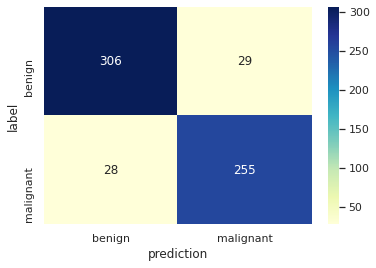

In [22]:
fig = plot_confusion_matrix_ensemble(train_fix_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-train-confusion-matrix.svg", bbox_inches = "tight")

In [23]:
pandas.DataFrame(calculate_confusion_matrix_stats(train_fix_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.907767,306,255,28,29,0.913433,0.901060,0.916168,0.897887,0.098940,0.086567,0.083832,0.907246,0.907225
1,0.907767,255,306,29,28,0.901060,0.913433,0.897887,0.916168,0.086567,0.098940,0.102113,0.907246,0.907225


## ROC Curve

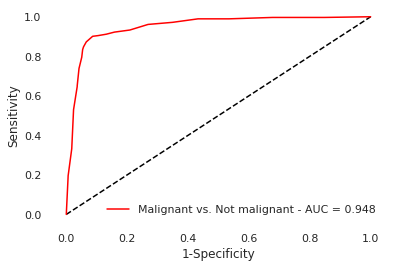

In [24]:
fig = plot_roc_curve(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

In [ ]:
fig = plot_precision_recall(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-precisionrecall.svg", bbox_inches = "tight")

# Validation

In [ ]:
model = best_model
predictions = model.predict(validation_set)
probabilities = model.predict_proba(validation_set)
pm.record("validation_labels", list(validation_labels))
pm.record("validation_probabilities", list(probabilities[:,1]))
pm.record("validation_predictions", list(predictions))

In [ ]:
print("accuracy: {}".format(metrics.accuracy_score(validation_labels, predictions)))

In [ ]:
fig = plot_confusion_matrix_ensemble(validation_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-validation-confusion-matrix.svg", bbox_inches = "tight")

In [ ]:
pandas.DataFrame(calculate_confusion_matrix_stats(validation_labels, probabilities[:,1]))

## ROC Curve

In [ ]:
fig = plot_roc_curve(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

In [ ]:
fig = plot_precision_recall(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-precisionrecall.svg", bbox_inches = "tight")

# Test

In [25]:
model = best_model
predictions = model.predict(test_set)
probabilities = model.predict_proba(test_set)
pm.record("test_labels", list(test_labels))
pm.record("test_probabilities", list(probabilities[:,1]))
pm.record("test_predictions", list(predictions))

In [26]:
print("accuracy: {}".format(metrics.accuracy_score(test_labels, predictions)))

accuracy: 0.9


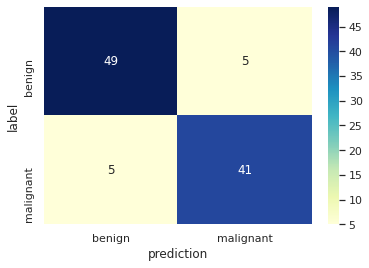

In [27]:
fig = plot_confusion_matrix_ensemble(test_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-test-confusion-matrix.svg", bbox_inches = "tight")

In [28]:
len(test_labels)

100

In [29]:
pandas.DataFrame(calculate_confusion_matrix_stats(test_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.9,49,41,5,5,0.907407,0.891304,0.907407,0.891304,0.108696,0.092593,0.092593,0.899356,0.89932
1,0.9,41,49,5,5,0.891304,0.907407,0.891304,0.907407,0.092593,0.108696,0.108696,0.899356,0.89932


## ROC Curve

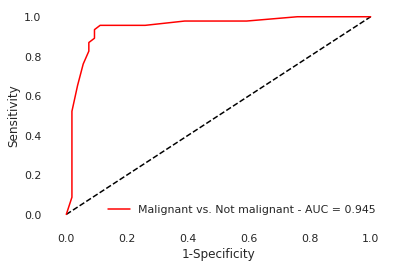

In [30]:
fig = plot_roc_curve(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

In [ ]:
fig = plot_precision_recall(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-precisionrecall.svg", bbox_inches = "tight")

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.